## TFM:Impacto de la calidad del aire en la salud de las personas en la ciudad de Madrid

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import time
import datetime
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from catboost import CatBoostRegressor
import shap
from lightgbm import LGBMRegressor

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_excel('data/CMBD_6_20181217-135856.xlsx')

In [4]:
df_calidad_aire_07=pd.read_csv('data/datos07.csv',sep=';')
df_calidad_aire_08=pd.read_csv('data/datos08.csv',sep=';')
df_calidad_aire_09=pd.read_csv('data/datos09.csv',sep=';')
df_calidad_aire_10=pd.read_csv('data/datos10.csv',sep=';')
df_calidad_aire_11=pd.read_csv('data/datos11.csv',sep=';')
df_calidad_aire_12=pd.read_csv('data/datos12.csv',sep=';')
df_calidad_aire_13=pd.read_csv('data/datos13.csv',sep=';')
df_calidad_aire_14=pd.read_csv('data/datos14.csv',sep=';')
df_calidad_aire_15=pd.read_csv('data/datos15.csv',sep=';')
df_calidad_aire=pd.concat([df_calidad_aire_07, df_calidad_aire_08,df_calidad_aire_09,df_calidad_aire_10,df_calidad_aire_11,df_calidad_aire_12,df_calidad_aire_13,df_calidad_aire_14,df_calidad_aire_15],axis=0,ignore_index=True)

In [5]:
df_temperatura_07=pd.read_csv('data/temp_2007.csv')
df_temperatura_08=pd.read_csv('data/temp_2008.csv')
df_temperatura_09=pd.read_csv('data/temp_2009.csv')
df_temperatura_10=pd.read_csv('data/temp_2010.csv')
df_temperatura_11=pd.read_csv('data/temp_2011.csv')
df_temperatura_12=pd.read_csv('data/temp_2012.csv')
df_temperatura_13=pd.read_csv('data/temp_2013.csv')
df_temperatura_14=pd.read_csv('data/temp_2014.csv')
df_temperatura_15=pd.read_csv('data/temp_2015.csv')
df_temperatura=pd.concat([df_temperatura_07, df_temperatura_08,df_temperatura_09,df_temperatura_10,df_temperatura_11,df_temperatura_12,df_temperatura_13,df_temperatura_14,df_temperatura_15],axis=0,ignore_index=True)

## Análisis exploratorio

In [6]:
df.head()

Año  Hospital Recodificado  Comunidad Autónoma  Provincia  Grupo Hospital  \
0  2013    -398345888794880068                  13         28               4   
1  2013   -3959599681650518086                  13         28               3   
2  2013   -3959599681650518086                  13         28               3   
3  2013  -1468647043-245326524                  13         28               4   
4  2013   946141513-1168024764                  13         28               3   

   Grupo Cluster Historia Recodificada       CIP Recodificado  \
0              4  -1687781257578748014   -320943158-171303395   
1              4    166370745435838543     648485069584850511   
2              4    183632305468848809   899288196-1988273609   
3              5   2877111881585847151  -961279109-1723117644   
4              3  17519509571482774643     -33451060035352825   

   Fecha de nacimiento  Sexo  Provincia Residencia  Régimen Financiación  \
0             10041944     1                    28                     1   
1             10061937     1                    28                     1   
2             14111923     1                    28                     1   
3             10051956     2                    28                     1   
4              7091928     1                    28                     1   

   Fecha de ingreso  Tipo Ingreso  Fecha de alta  Tipo Alta  Estancia  \
0          30102013             1       13112013          1        14   
1          19032013             1       25032013          1         6   
2          15112013             1       26112013          1        11   
3          28042013             1       14052013          1        16   
4           7022013             2        8022013          1         1   

  Diagnóstico Principal Diagnóstico 2 Diagnóstico 3 Diagnóstico 4  \
0                 428.0           NaN         276.1         276.8   
1                491.21           NaN        518.84         519.8   
2                 428.0           NaN        518.84         584.9   
3                 428.1           NaN        428.20        518.81   
4                 162.5           NaN           496         173.9   

  Diagnóstico 5 Diagnóstico 6 Diagnóstico 7 Diagnóstico 8 Diagnóstico 9  \
0        491.20         494.0        041.85        518.83         401.9   
1         305.1        V15.05         V46.2        600.00         V60.3   
2         516.8        491.22         585.9         416.8        403.90   
3        491.20         305.1         416.8         276.2         424.2   
4        600.90         414.8        414.01        250.00         272.0   

  Diagnóstico 10 Diagnóstico 11 Diagnóstico 12 Diagnóstico 13 Diagnóstico 14  \
0         427.31          553.3          V43.4         V15.82         V58.61   
1         V15.82            NaN            NaN            NaN            NaN   
2         250.00         427.31          274.9          426.4         600.00   
3         414.10            NaN            NaN            NaN            NaN   
4          401.9         V15.82         V45.81         V45.61         V10.83   

   Fecha de Intervención Procedimiento 1 Procedimiento 2 Procedimiento 3  \
0                    NaN           39.96           99.21           93.96   
1                    NaN           90.42           87.44           87.44   
2                    NaN           90.42           87.44           87.44   
3                    NaN           88.72           87.44           89.37   
4                    NaN           33.26           33.24             NaN   

  Procedimiento 4 Procedimiento 5 Procedimiento 6 Procedimiento 7  \
0           89.39           90.59           91.39           90.42   
1           89.52           89.65           89.65             NaN   
2           89.52           89.65           88.72             NaN   
3           89.17           89.52             NaN             NaN   
4             NaN             NaN             NaN             NaN   

  Procedimi

In [7]:
df.tail()

Año Hospital Recodificado  Comunidad Autónoma  Provincia  \
140932  2014   -397825696459335749                  13         28   
140933  2014  -3959599681650518086                  13         28   
140934  2014   6786010821767932736                  13         28   
140935  2014   -398345888794880068                  13         28   
140936  2014   6785908421717601093                  13         28   

        Grupo Hospital  Grupo Cluster   Historia Recodificada  \
140932               3              4    15732651961347031435   
140933               3              4   1259742565-1684660259   
140934               2              3       82420401566747514   
140935               4              4  -1318909344-1737054105   
140936               4              5    -758230369-639741394   

             CIP Recodificado  Fecha de nacimiento  Sexo  \
140932  -148801774-1928770906              7111939     2   
140933  -12521883511529773304              9011954     2   
140934    4927991441436875167              7101953     1   
140935  2075399370-1949447169             19041951     1   
140936  -18336156992074847197              5111946     1   

        Provincia Residencia  Régimen Financiación  Fecha de ingreso  \
140932                    28                     1          23112013   
140933                    28                     1          10122013   
140934                    28                     1          31102014   
140935                    28                     1           3032014   
140936                    28                     1          29012014   

        Tipo Ingreso  Fecha de alta  Tipo Alta  Estancia  \
140932             1        7012014          1        45   
140933             1       10022014          4        62   
140934             1       18112014          1        18   
140935             1       15032014          4        12   
140936             1       14022014          1        16   

       Diagnóstico Principal Diagnóstico 2 Diagnóstico 3 Diagnóstico 4  \
140932                491.21        E878.1         519.8        518.84   
140933                   486           NaN        518.81         518.0   
140934                   486           NaN         510.9        511.89   
140935                   481           NaN        518.81        995.91   
140936                511.81           NaN        518.81         428.0   

       Diagnóstico 5 Diagnóstico 6 Diagnóstico 7 Diagnóstico 8 Diagnóstico 9  \
140932         511.9        786.30         276.1         276.7        415.12   
140933         511.9        733.13        516.36         276.2        733.00   
140934         494.1        491.21         511.9        518.81        799.02   
140935        491.21         511.9         276.2         584.9        518.89   
140936         162.5         196.1         197.2        255.10         584.9   

       Diagnóstico 10 Diagnóstico 11 Diagnóstico 12 Diagnóstico 13  \
140932          038.9         996.61         250.00          401.9   
140933          519.8         V10.11         V15.82          437.0   
140934          272.4          790.6         275.49         712.30   
140935          573.8          285.9          305.1         303.91   
140936         405.99         278.00            496         427.31   

       Diagnóstico 14  Fecha de Intervención Procedimiento 1 Procedimiento 2  \
140932         V45.82             17122013.0           37.87           33.22   
140933          V46.2              6022014.0           77.49           81.65   
140934          122.8              7112014.0           34.06           34.04   
140935         V12.54                    NaN           34.04           34.20   
140936          276.8             10022014.0           34.92           99.25   

       Procedimiento 3 Procedimiento 4 Procedimiento 5 Procedimiento 6  \
140932           99.21           87.41           88.43           88.72   
140933           33.24           90.42           91.32           88.93  

In [8]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [9]:
df.año.sort_values().unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [10]:
df.describe(include='all').T

count unique                  top    freq  \
año                    140937.0    NaN                  NaN     NaN   
hospital_recodificado    140937     34  -398345888794880068   16385   
comunidad_autónoma     140937.0    NaN                  NaN     NaN   
provincia              140937.0    NaN                  NaN     NaN   
grupo_hospital         140937.0    NaN                  NaN     NaN   
...                         ...    ...                  ...     ...   
nivel_mortalidad       140937.0    NaN                  NaN     NaN   
servicio                 140937      2                  NML  139565   
edad                   140937.0    NaN                  NaN     NaN   
reingreso              140937.0    NaN                  NaN     NaN   
coste                  140937.0    NaN                  NaN     NaN   

                              mean          std     min      25%      50%  \
año                    2011.504729     2.248531  2008.0   2010.0   2012.0   
hospital_recodificado          NaN          NaN     NaN      NaN      NaN   
comunidad_autónoma            13.0          0.0    13.0     13.0     13.0   
provincia                     28.0          0.0    28.0     28.0     28.0   
grupo_hospital            3.069386     0.963666     1.0      2.0      3.0   
...                            ...          ...     ...      ...      ...   
nivel_mortalidad          2.166997     0.967887     0.0      1.0      2.0   
servicio                       NaN          NaN     NaN      NaN      NaN   
edad                     66.232373    17.506537     0.0     57.0     70.0   
reingreso                 0.129136     0.335351     0.0      0.0      0.0   
coste                  4326.082895  5533.796695     0.0  3020.73  4040.28   

                           75%        max  
año                     2013.0     2015.0  
hospital_recodificado      NaN        NaN  
comunidad_autónoma        13.0       13.0  
provincia                 28.0       28.0  
grupo_hospital             4.0        4.0  
...                        ...        ...  
nivel_mortalidad           3.0        4.0  
servicio                   NaN        NaN  
edad                      79.0      110.0  
reingreso                  0.0        1.0  
coste                  4584.57  116051.54  

[66 rows x 11 columns]

In [11]:
comunidad_autonoma=13
provincia=28

In [12]:
df.drop(['comunidad_autónoma','provincia'],axis=1,inplace=True)

In [13]:
df_calidad_aire.head()

PROVINCIA  MUNICIPIO  ESTACION  MAGNITUD PUNTO_MUESTREO   ANO  MES   D01  \
0         28         79         4         1  28079004_1_38  2007    1  12.0   
1         28         79         4         1  28079004_1_38  2007    2  20.0   
2         28         79         4         1  28079004_1_38  2007    3  12.0   
3         28         79         4         1  28079004_1_38  2007    4  10.0   
4         28         79         4         1  28079004_1_38  2007    5   8.0   

  V01   D02 V02   D03 V03   D04 V04   D05 V05   D06 V06   D07 V07   D08 V08  \
0   V  17.0   V  27.0   V  25.0   V  23.0   V  20.0   V  15.0   V  11.0   V   
1   V  20.0   V  18.0   V  19.0   V  17.0   V  17.0   V  14.0   V  13.0   V   
2   V  11.0   V  11.0   V  14.0   V  13.0   V  13.0   V  11.0   V  15.0   V   
3   V  11.0   V  13.0   V  14.0   V  11.0   V  12.0   V  11.0   V  13.0   V   
4   V   8.0   V   9.0   V  11.0   V  10.0   V   9.0   V  11.0   V  11.0   V   

    D09 V09   D10 V10   D11 V11   D12 V12   D13 V13   D14 V14   D15 V15   D16  \
0  15.0   V  15.0   V  26.0   V  31.0   V  29.0   V  23.0   V  20.0   V  16.0   
1  13.0   V  12.0   V  11.0   V  13.0   V  17.0   V  14.0   V  21.0   V  17.0   
2  18.0   V  15.0   V  17.0   V  16.0   V  18.0   V  19.0   V  17.0   V  17.0   
3  14.0   V  13.0   V  12.0   V  13.0   V  13.0   V  12.0   V  10.0   V  11.0   
4  10.0   V  10.0   V   9.0   V   9.0   V   8.0   V   8.0   V   9.0   V  11.0   

  V16   D17 V17   D18 V18   D19 V19   D20 V20   D21 V21   D22 V22   D23 V23  \
0   V  11.0   V  12.0   V  20.0   V  22.0   V  20.0   V  12.0   V  15.0   V   
1   V  12.0   V  15.0   V  17.0   V  16.0   V  16.0   V  12.0   V  11.0   V   
2   V  12.0   V  14.0   V  13.0   V  15.0   V  13.0   V  14.0   V  16.0   V   
3   V  11.0   V  11.0   V  11.0   V  10.0   V  10.0   V  10.0   V  10.0   V   
4   V   9.0   V   9.0   V   9.0   V   8.0   V   8.0   V   8.0   V   8.0   V   

    D24 V24   D25 V25   D26 V26   D27 V27   D28 V28   D29 V29   D30 V30   D31  \
0  18.0   V  15.0   V  15.0   V  15.0   V  21.0   V  19.0   V  14.0   V  21.0   
1  12.0   V  13.0   V  18.0   V  20.0   V  14.0   V   0.0   N   0.0   N   0.0   
2  16.0   V  15.0   V  17.0   V  13.0   V  14.0   V  14.0   V  13.0   V  11.0   
3  11.0   V  10.0   V   8.0   V   8.0   V   8.0   V   9.0   V   8.0   V   0.0   
4   8.0   V   9.0   V   8.0   V   8.0   V   8.0   V   9.0   V   8.0   V   8.0   

  V31  
0   V  
1   N  
2   V  
3   N  
4   V

In [14]:
df_temperatura.head()

fecha indicativo      glo    hr  tm_min    ta_max  ts_min  nt_30  \
0  2007-1      3194U  20938.0   NaN     NaN       NaN     NaN    NaN   
1  2007-2      3194U  25655.0  67.0     4.8  20.6(16)     9.4    0.0   
2  2007-3      3194U  51782.0  54.0     3.4  21.2(18)     7.7    0.0   
3  2007-4      3194U  50001.0   NaN     NaN       NaN     NaN    NaN   
4  2007-5      3194U  67908.0   NaN     NaN       NaN     NaN    NaN   

     ta_min     e  nt_00  ti_max  tm_mes  tm_max    p_max  nw_55      w_racha  \
0       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   
1  -1.5(01)  79.0    2.0     7.9     9.3    13.7      NaN    NaN          NaN   
2  -1.3(25)  66.0    1.0     9.5     9.7    15.9  7.3(06)    4.0  02/22.8(22)   
3       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   
4       NaN   NaN    NaN     NaN     NaN     NaN      NaN    NaN          NaN   

   np_100  nw_91  np_001  w_rec  np_300  p_mes  w_med  np_010  
0     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
1     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
2     0.0    0.0     5.0  171.0     0.0   21.7    7.0     4.0  
3     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN  
4     NaN    NaN     NaN    NaN     NaN    NaN    NaN     NaN

In [15]:
df.dtypes

año                        int64
hospital_recodificado     object
grupo_hospital             int64
grupo_cluster              int64
historia_recodificada     object
                          ...   
nivel_mortalidad           int64
servicio                  object
edad                       int64
reingreso                  int64
coste                    float64
Length: 64, dtype: object

In [16]:
df_calidad_aire.dtypes

PROVINCIA           int64
MUNICIPIO           int64
ESTACION            int64
MAGNITUD            int64
PUNTO_MUESTREO     object
                   ...   
V29                object
D30               float64
V30                object
D31               float64
V31                object
Length: 69, dtype: object

In [17]:
df_temperatura.dtypes

fecha          object
indicativo     object
glo           float64
hr            float64
tm_min        float64
ta_max         object
ts_min        float64
nt_30         float64
ta_min         object
e             float64
nt_00         float64
ti_max        float64
tm_mes        float64
tm_max        float64
p_max          object
nw_55         float64
w_racha        object
np_100        float64
nw_91         float64
np_001        float64
w_rec         float64
np_300        float64
p_mes         float64
w_med         float64
np_010        float64
dtype: object

In [18]:
df.shape

(140937, 64)

In [19]:
df_calidad_aire.shape

(13898, 69)

In [20]:
df_temperatura.shape

(108, 25)

In [21]:
df.isnull().mean().sort_values(ascending=False)*100

procedimiento_20         98.493653
procedimiento_19         98.027487
procedimiento_18         97.618085
procedimiento_17         97.168948
procedimiento_16         96.522560
                           ...    
cip_recodificado          0.000000
historia_recodificada     0.000000
grupo_cluster             0.000000
grupo_hospital            0.000000
coste                     0.000000
Length: 64, dtype: float64

In [22]:
df_calidad_aire.isnull().mean().sort_values(ascending=False)*100

PROVINCIA    0.0
V19          0.0
V22          0.0
D22          0.0
V21          0.0
            ... 
D12          0.0
V12          0.0
D13          0.0
V13          0.0
V31          0.0
Length: 69, dtype: float64

In [23]:
df_temperatura.isnull().mean().sort_values(ascending=False)*100

nw_91         62.037037
w_racha       62.037037
nw_55         62.037037
w_rec         60.185185
np_010        46.296296
p_mes         46.296296
np_300        46.296296
np_001        46.296296
np_100        46.296296
p_max         46.296296
hr            43.518519
tm_max        42.592593
tm_mes        42.592593
ti_max        42.592593
nt_00         42.592593
ta_min        42.592593
nt_30         42.592593
ts_min        42.592593
ta_max        42.592593
tm_min        42.592593
w_med         39.814815
e             27.777778
indicativo     0.000000
glo            0.000000
fecha          0.000000
dtype: float64

In [24]:
df.duplicated().sum()

0

In [25]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values()

servicio                     2
tipo_gdr_ap                  3
tipo_gdr_apr                 3
hospital_recodificado       34
procedimiento_10           313
procedimiento_9            365
procedimiento_8            406
procedimiento_7            439
procedimiento_6            479
procedimiento_4            532
procedimiento_5            536
procedimiento_3            573
procedimiento_2            658
procedimiento_1            758
diagnóstico_2             1603
diagnóstico_14            1628
diagnóstico_principal     1714
diagnóstico_13            1955
diagnóstico_12            2134
diagnóstico_11            2315
diagnóstico_10            2452
diagnóstico_9             2709
diagnóstico_3             2749
diagnóstico_8             2817
diagnóstico_7             2934
diagnóstico_4             2957
diagnóstico_6             3013
diagnóstico_5             3088
cip_recodificado         78266
historia_recodificada    92349
dtype: int64

In [26]:
def vuelta_fecha(x):
    x=str(x)
    if len(x)==8:
        año=x[4:]
        mes=x[2:4]
        dia=x[:2]
        fecha=año+'-'+mes+'-'+dia
    else:
        año=x[3:]
        mes=x[1:3]
        dia=x[:1]
        fecha=año+'-'+mes+'-'+'0'+dia
    return pd.to_datetime(fecha,format='%Y-%m-%d')

In [27]:
df.fecha_de_ingreso=df.fecha_de_ingreso.apply(lambda x:vuelta_fecha(x))

<AxesSubplot:>

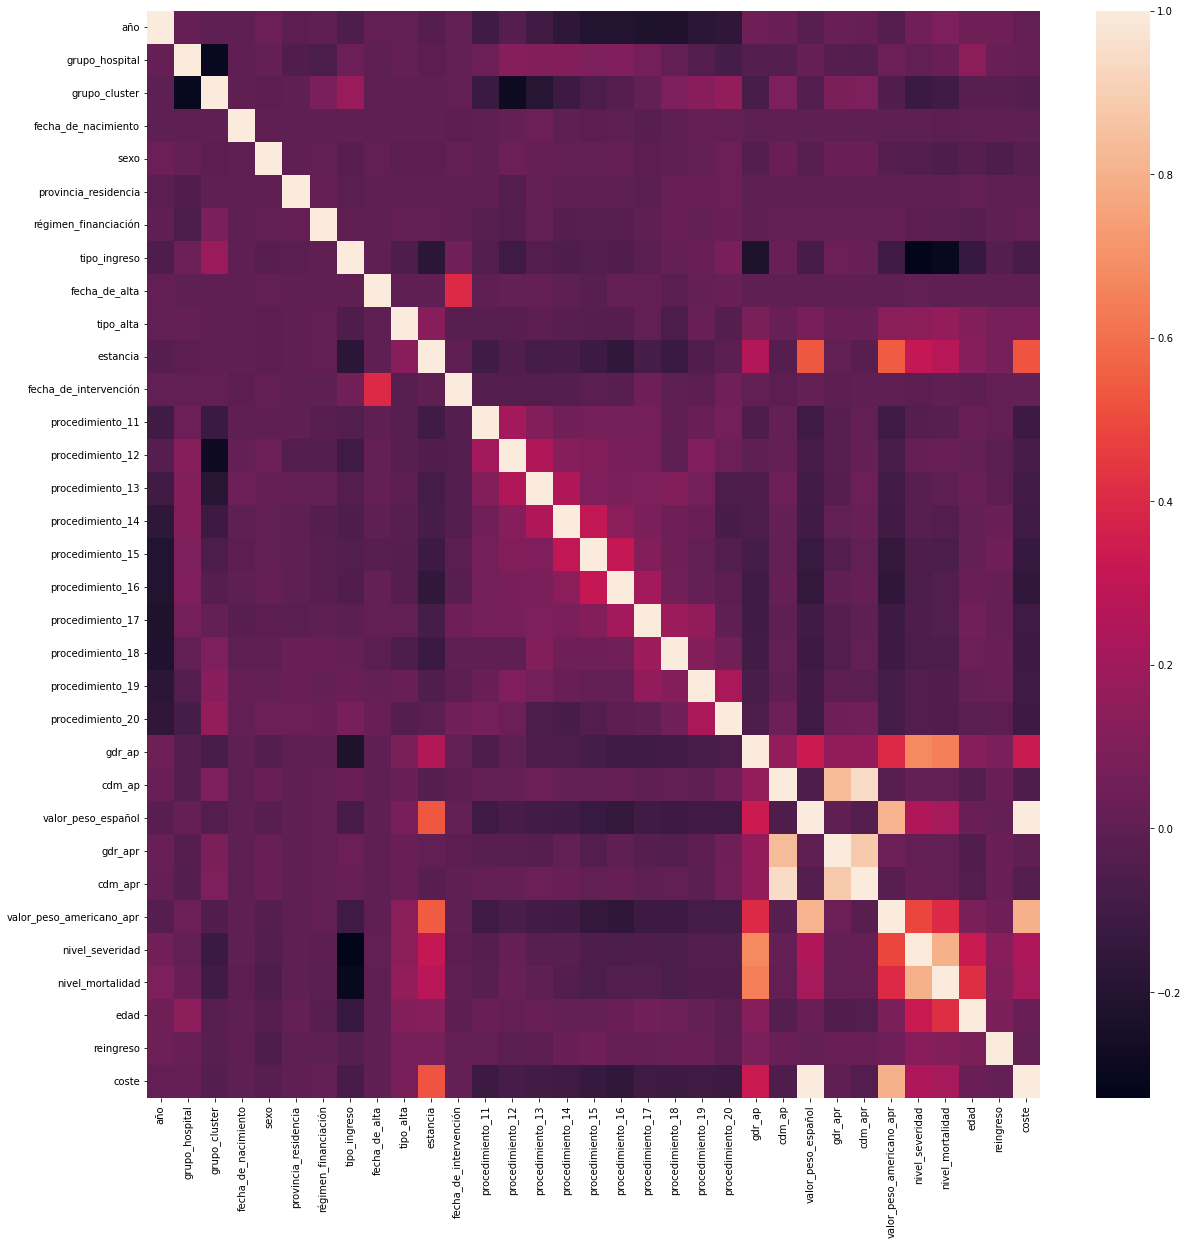

In [28]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr())

In [29]:
df.select_dtypes('number').describe()

año  grupo_hospital  grupo_cluster  fecha_de_nacimiento  \
count  140937.000000   140937.000000  140937.000000         1.409370e+05   
mean     2011.504729        3.069386       8.712382         1.550114e+07   
std         2.248531        0.963666      20.757274         8.826431e+06   
min      2008.000000        1.000000       1.000000         1.011900e+06   
25%      2010.000000        2.000000       3.000000         8.041947e+06   
50%      2012.000000        3.000000       4.000000         1.510195e+07   
75%      2013.000000        4.000000       5.000000         2.307194e+07   
max      2015.000000        4.000000      99.000000         3.112201e+07   

                sexo  provincia_residencia  régimen_financiación  \
count  140937.000000         140937.000000         140937.000000   
mean        1.385640             28.295345              1.108190   
std         0.486806              5.048316              0.773977   
min         1.000000              1.000000              1.000000   
25%         1.000000             28.000000              1.000000   
50%         1.000000             28.000000              1.000000   
75%         2.000000             28.000000              1.000000   
max         3.000000             99.000000              9.000000   

        tipo_ingreso  fecha_de_alta      tipo_alta       estancia  \
count  140937.000000   1.409370e+05  140937.000000  140937.000000   
mean        1.229322   1.602181e+07       1.148045       8.233792   
std         0.505773   8.706296e+06       0.709761      10.094767   
min         1.000000   1.012008e+06       1.000000       0.000000   
25%         1.000000   9.012009e+06       1.000000       3.000000   
50%         1.000000   1.605201e+07       1.000000       6.000000   
75%         1.000000   2.312201e+07       1.000000      10.000000   
max         9.000000   3.112202e+07       9.000000     623.000000   

       fecha_de_intervención  procedimiento_11  procedimiento_12  \
count           4.998000e+03      12341.000000       7648.000000   
mean            1.601155e+07         89.994133         88.978576   
std             8.673040e+06         11.674164         13.366136   
min             1.012013e+06          0.120000          0.140000   
25%             9.022010e+06         89.390000         88.927500   
50%             1.608201e+07         90.490000         90.420000   
75%             2.311201e+07         93.960000         93.940000   
max             3.112201e+07         99.840000         99.990000   

       procedimiento_13  procedimiento_14  procedimiento_15  procedimiento_16  \
count       4976.000000       7378.000000       6064.000000       4901.000000   
mean          89.173368         90.813866         90.658287         90.871745   
std           12.870377          9.212901          9.544991          9.400413   
min            0.120000          0.140000          0.140000          0.140000   
25%           89.370000         89.170000         89.370000         89.520000   
50%           90.460000         90.410000         90.310000         90.490000   
75%           93.940000         93.960000         93.960000         93.960000   
max           99.910000         99.990000         99.840000         99.940000   

       procedimiento_17  procedimiento_18  procedimiento_19  procedimiento_20  \
count       3990.000000       3357.000000       2780.000000       2123.000000   
mean          90.641140         90.146235         90.557446         91.138337   
std            9.454177          9.762235          8.079143          7.419758   
min            0.140000          0.140000          0.140000          0.140000   
25%           89.520000         89.370000         89.370000         89.520000   
50%           90.420000         90.410000         90.410000         90.590000   
75%           93.940000         92.180000         92.140000         93.940000   
max           99.840000         99.840000         99.840000         99.840000   

              gdr_ap    

In [30]:
df.grupo_hospital.value_counts(dropna=False)

4    60908
3    38661
2    31607
1     9761
Name: grupo_hospital, dtype: int64

In [31]:
df.grupo_cluster.value_counts(dropna=False)

4     46866
5     41405
3     26713
2      7183
99     7056
1      5985
6      5729
Name: grupo_cluster, dtype: int64

In [32]:
df.provincia_residencia.value_counts(dropna=False)

28    137962
99       585
45       359
53       195
19       189
13       170
40       108
10       103
5         91
16        87
6         86
11        68
30        60
24        57
35        56
47        49
50        48
38        46
3         45
18        40
33        33
8         30
2         29
9         28
7         28
37        25
41        24
29        24
36        23
14        23
27        21
4         19
15        19
46        19
42        19
23        18
49        18
39        16
34        15
48        13
31        12
51        12
20        11
26        10
32        10
21         8
12         6
1          5
44         5
17         3
43         3
52         2
22         1
25         1
Name: provincia_residencia, dtype: int64

In [33]:
df.régimen_financiación.value_counts(dropna=False)

1    137449
3      1518
6       978
9       659
8       252
5        43
4        38
Name: régimen_financiación, dtype: int64

In [34]:
df.tipo_ingreso.value_counts(dropna=False)

1    110010
2     30728
9       199
Name: tipo_ingreso, dtype: int64

In [35]:
df.tipo_alta.value_counts(dropna=False)

1    133930
4      4824
2       875
5       557
3       453
9       298
Name: tipo_alta, dtype: int64

In [36]:
conditionlist = [
    (df['edad'] <= 12) ,
    (df['edad'] > 12) & (df['edad'] <=18),
    (df['edad'] >18) & (df['edad'] <=26),
    (df['edad'] >=27) & (df['edad'] <=59),
    (df['edad']>=60)]
choicelist = ['Niño','Adolescente', 'Joven', 'Adulto','Persona Mayor']
df['grupo_edad'] = np.select(conditionlist, choicelist, default='Not Specified')

<AxesSubplot:title={'center':'estancia'}, xlabel='[grupo_edad]'>

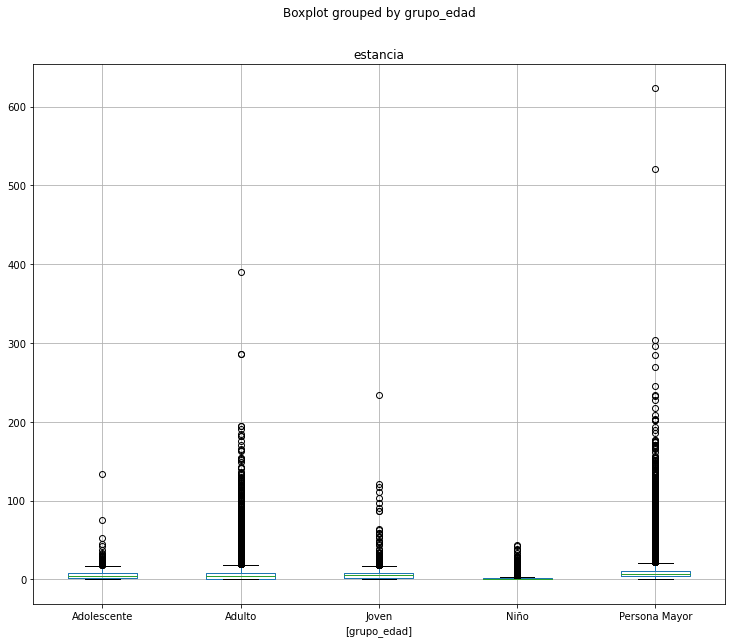

In [37]:
df[['grupo_edad','estancia']].boxplot(by='grupo_edad',figsize=(12,10))


In [38]:
df.corr()['edad'].sort_values(ascending=False)

edad                        1.000000
nivel_mortalidad            0.415884
nivel_severidad             0.328792
grupo_hospital              0.133830
gdr_ap                      0.120839
estancia                    0.118842
tipo_alta                   0.110591
valor_peso_americano_apr    0.087202
reingreso                   0.086420
procedimiento_17            0.053349
año                         0.040849
procedimiento_18            0.037230
procedimiento_16            0.032834
valor_peso_español          0.032685
coste                       0.032284
procedimiento_13            0.028031
procedimiento_11            0.024907
procedimiento_14            0.017342
procedimiento_15            0.016560
procedimiento_19            0.016062
provincia_residencia        0.015848
procedimiento_12            0.008433
fecha_de_alta               0.000444
fecha_de_nacimiento        -0.003755
fecha_de_intervención      -0.008170
procedimiento_20           -0.016498
grupo_cluster              -0.024309
r

In [39]:
df.corr()['estancia'].sort_values(ascending=False)

estancia                    1.000000
valor_peso_americano_apr    0.545374
valor_peso_español          0.532703
coste                       0.527187
nivel_severidad             0.312185
nivel_mortalidad            0.272019
gdr_ap                      0.253979
tipo_alta                   0.124386
edad                        0.118842
reingreso                   0.074027
régimen_financiación        0.009893
gdr_apr                     0.003686
fecha_de_intervención       0.001639
provincia_residencia        0.000313
fecha_de_alta              -0.000206
grupo_cluster              -0.000623
fecha_de_nacimiento        -0.002552
sexo                       -0.009876
grupo_hospital             -0.011666
procedimiento_20           -0.015590
cdm_apr                    -0.023846
año                        -0.030515
cdm_ap                     -0.032888
procedimiento_19           -0.049988
procedimiento_12           -0.052130
procedimiento_14           -0.079313
procedimiento_17           -0.084788
p

In [40]:
df.corr()['coste'].sort_values(ascending=False)			

coste                       1.000000
valor_peso_español          0.996378
valor_peso_americano_apr    0.800385
estancia                    0.527187
gdr_ap                      0.328598
nivel_severidad             0.240144
nivel_mortalidad            0.215871
tipo_alta                   0.079083
edad                        0.032284
grupo_hospital              0.021125
reingreso                   0.016368
fecha_de_intervención       0.014243
régimen_financiación        0.011479
año                         0.010191
gdr_apr                     0.002322
provincia_residencia       -0.000938
fecha_de_alta              -0.001295
fecha_de_nacimiento        -0.004854
sexo                       -0.019226
grupo_cluster              -0.038238
cdm_apr                    -0.041377
cdm_ap                     -0.056967
tipo_ingreso               -0.076619
procedimiento_12           -0.079736
procedimiento_13           -0.095565
procedimiento_19           -0.107013
procedimiento_17           -0.107273
p

In [41]:
df.corr()['valor_peso_español'].sort_values(ascending=False)

valor_peso_español          1.000000
coste                       0.996378
valor_peso_americano_apr    0.804885
estancia                    0.532703
gdr_ap                      0.332888
nivel_severidad             0.242389
nivel_mortalidad            0.216155
tipo_alta                   0.080082
edad                        0.032685
grupo_hospital              0.021226
reingreso                   0.015405
fecha_de_intervención       0.014758
régimen_financiación        0.011053
provincia_residencia        0.001664
gdr_apr                     0.001554
fecha_de_alta              -0.001089
fecha_de_nacimiento        -0.004772
sexo                       -0.020847
año                        -0.022892
grupo_cluster              -0.038671
cdm_apr                    -0.042143
cdm_ap                     -0.058313
procedimiento_12           -0.075800
tipo_ingreso               -0.077084
procedimiento_13           -0.090691
procedimiento_19           -0.098724
procedimiento_17           -0.101713
p

In [42]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')

In [43]:
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [44]:
px.line(df.groupby('ingreso_mes_año').count().reset_index().sort_values('ingreso_mes_año').rename(columns={"fecha_de_ingreso": "numero de ingresos"}),x='ingreso_mes_año',y="numero de ingresos")

In [45]:
features=['grupo_cluster','sexo','fecha_de_ingreso','tipo_ingreso','estancia','historia_recodificada','cip_recodificado','diagnóstico_principal','diagnóstico_2','procedimiento_1','valor_peso_español','nivel_severidad','nivel_mortalidad','servicio','edad','reingreso','coste']

In [46]:
len(features)

17

<AxesSubplot:title={'center':'edad'}, xlabel='[tipo_ingreso]'>

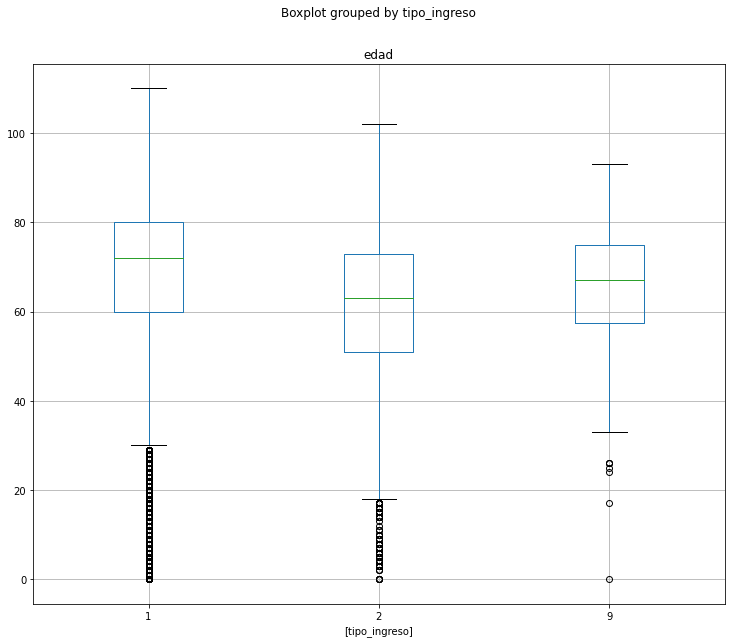

In [47]:
df[['tipo_ingreso','edad']].boxplot(by='tipo_ingreso',figsize=(12,10))

<AxesSubplot:title={'center':'estancia'}, xlabel='[sexo]'>

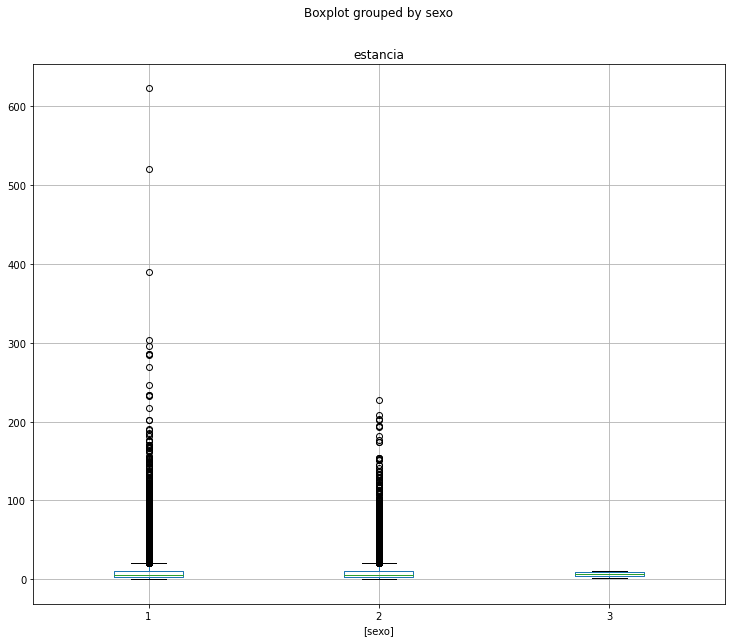

In [48]:
df[['estancia','sexo']].boxplot(by='sexo',figsize=(12,10))

In [49]:
# px.bar(df[['nivel_severidad','sexo']].groupby(by='sexo').value_counts().reset_index().set_index(['sexo','nivel_severidad']).reset_index().rename(columns={0:'valor'}),x='nivel_severidad',y='valor',color='sexo')

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [50]:
df.ingreso_mes_año.value_counts()

2015-01-01    2226
2011-01-01    2134
2012-01-01    2130
2014-01-01    1887
2013-12-01    1879
              ... 
2007-12-01     549
2007-11-01      19
2007-09-01       3
2007-10-01       3
2007-08-01       2
Name: ingreso_mes_año, Length: 101, dtype: int64

In [51]:
df[features].head()

grupo_cluster  sexo fecha_de_ingreso  tipo_ingreso  estancia  \
0              4     1       2013-10-30             1        14   
1              4     1       2013-03-19             1         6   
2              4     1       2013-11-15             1        11   
3              5     2       2013-04-28             1        16   
4              3     1       2013-02-07             2         1   

  historia_recodificada       cip_recodificado diagnóstico_principal  \
0  -1687781257578748014   -320943158-171303395                 428.0   
1    166370745435838543     648485069584850511                491.21   
2    183632305468848809   899288196-1988273609                 428.0   
3   2877111881585847151  -961279109-1723117644                 428.1   
4  17519509571482774643     -33451060035352825                 162.5   

  diagnóstico_2 procedimiento_1  valor_peso_español  nivel_severidad  \
0           NaN           39.96              0.9181                3   
1           NaN           90.42              0.9407                3   
2           NaN           90.42              0.9181                4   
3           NaN           88.72              0.9181                3   
4           NaN           33.26              0.9844                2   

   nivel_mortalidad servicio  edad  reingreso    coste  
0                 2      NML    69          1  4441.45  
1                 3      NML    75          0  4550.50  
2                 4      NML    90          0  4441.45  
3                 4      NML    56          0  4441.45  
4                 2      NML    84          0  4761.87

In [52]:
df=df[features]

<AxesSubplot:>

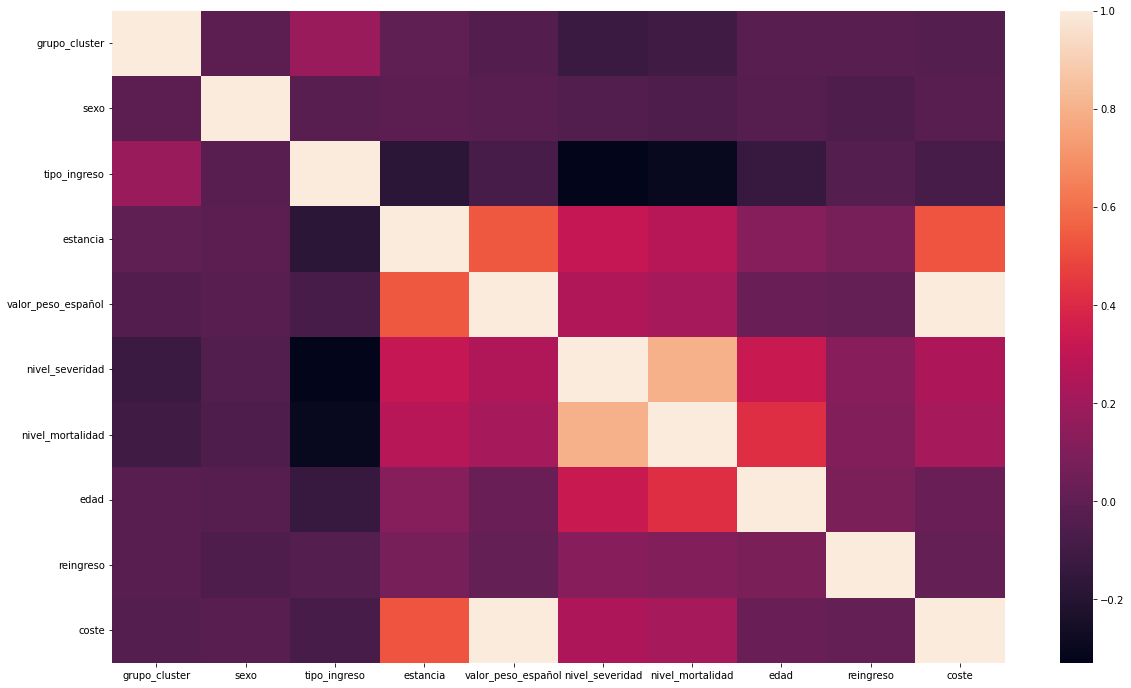

In [53]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr())

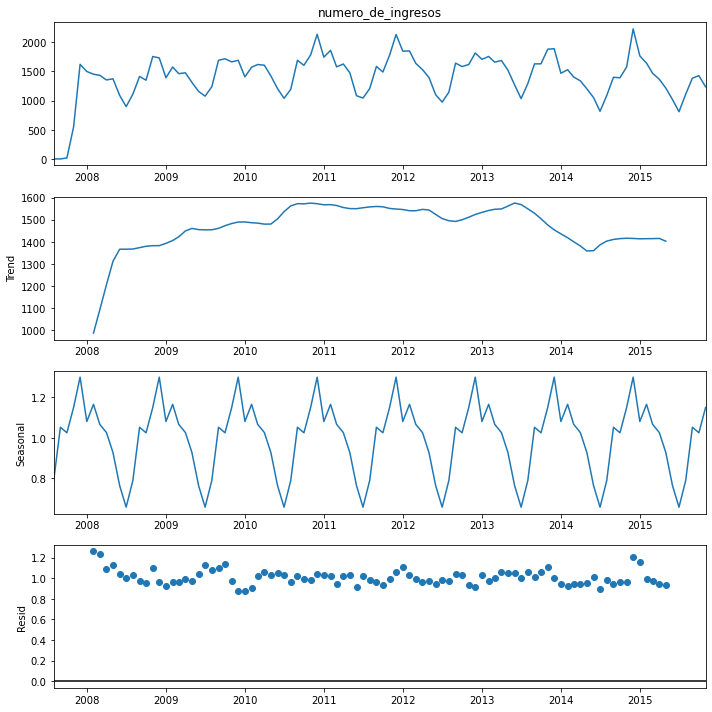

In [54]:
df_def=pd.read_csv('data/df_definitivo.csv',parse_dates=['fecha'])
df_serie_temporal = df_def.loc[:,['fecha','numero_de_ingresos']]
df_serie_temporal['fecha'] = pd.to_datetime(df_serie_temporal['fecha'])
df_serie_temporal.set_index(keys='fecha',inplace=True)
df_serie_temporal.dropna(inplace=True)

estacionalidad = seasonal_decompose(
    df_serie_temporal['numero_de_ingresos'],
    model='multiplicative',
    period=12
)

fig = estacionalidad.plot()
fig.set_size_inches(10,10)
fig.tight_layout()
plt.show()

## Calidad del aire

In [59]:
Ds = df_calidad_aire.columns[[x.startswith('D') for x in df_calidad_aire.columns]]

In [60]:
df_d = df_calidad_aire[Ds]

In [61]:
df_d.fillna(0,inplace=True)

c:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_calidad_aire['value'] = df_d.mean(axis=1)

In [63]:
df_calidad_aire = df_calidad_aire[['PUNTO_MUESTREO','MAGNITUD','ANO','MES','value']]

In [64]:
df_calidad_aire['fecha'] = df_calidad_aire['ANO'].astype(str) + '-' + df_calidad_aire['MES'].astype(str)

In [65]:
df_calidad_aire['fecha'] = pd.to_datetime(df_calidad_aire['fecha'])

In [66]:
df_magnitud = df_calidad_aire.groupby(['MAGNITUD','fecha']).mean().reset_index()

In [67]:
px.line(df_magnitud,x='fecha',y='value',color='MAGNITUD')

In [68]:
magnitud_nombre={1:'Dióxido de Azufre',6:'Monóxido de Carbono',
  7:'Monóxido de Nitrógeno',  8:'Dióxido de Nitrógeno', 
   9:'Partículas menor 2.5 μm', 10:'Partículas menor 10 μm', 
   12:'Óxidos de Nitrógeno', 14:'Ozono', 20:'Tolueno', 
   30:'Benceno', 35:'Etilbenceno', 42:'Hidrocarburos totales (hexano)', 
   43:'Metano', 44:'Hidrocarburos no metánicos (hexano)'}

In [69]:
def set_values(row, value):
    return value[row]

In [70]:
df_magnitud['MAGNITUD_NOMBRE']=df_magnitud.MAGNITUD.apply(set_values,args=(magnitud_nombre,))

In [71]:
px.line(df_magnitud.reset_index(),x='fecha',y='value',color='MAGNITUD_NOMBRE')

In [72]:
df_umbrales = pd.read_excel('data/Umbrales.xlsx')

In [73]:
df_fin = df_magnitud.merge(df_umbrales, left_on='MAGNITUD',right_on='CODIGO', how='inner')

In [74]:
particulas=['Dióxido de Azufre','Monóxido de Carbono','Dióxido de Nitrógeno','Partículas menor 2,5 μm','Partículas menor 10 μm','Óxidos de Nitrógeno','Ozono','Benceno']

In [75]:
df_fin.drop(['CODIGO','MAGNITUD_y'],axis=1,inplace=True)

In [76]:
df_fin.columns = ['CODIGO','fecha','ANO','MES', 'value', 'PARTICULA', 'ABREVIATURA','MEDIDA','LIMITE', 'COMENTARIO']

In [77]:
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = np.nan
df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8) & (df_fin.ANO==2013),'value'] = df_fin.loc[(df_fin.CODIGO==12) & (df_fin.MES==8)].value.mean()

In [78]:
df_fin.sample(20)

CODIGO      fecha   ANO  MES       value                PARTICULA  \
709      12 2012-02-01  2012    2   93.821237      Óxidos de Nitrógeno   
510      10 2010-04-01  2010    4   18.143695   Partículas menor 10 μm   
854      14 2015-03-01  2015    3   45.472350                    Ozono   
367       9 2010-08-01  2010    8   12.994624  Partículas menor 2.5 μm   
231       8 2008-04-01  2008    4   41.545699     Dióxido de Nitrógeno   
607      10 2014-04-01  2014    4   16.712366   Partículas menor 10 μm   
344       9 2008-09-01  2008    9   11.838710  Partículas menor 2.5 μm   
606      10 2014-04-01  2014    4   16.712366   Partículas menor 10 μm   
24        1 2009-01-01  2009    1   17.862903        Dióxido de Azufre   
51        1 2011-04-01  2011    4    6.367742        Dióxido de Azufre   
116       6 2007-09-01  2007    9    0.295565      Monóxido de Carbono   
576      10 2013-01-01  2013    1   13.827957   Partículas menor 10 μm   
45        1 2010-10-01  2010   10    9.315412        Dióxido de Azufre   
683      12 2009-12-01  2009   12  106.064516      Óxidos de Nitrógeno   
239       8 2008-12-01  2008   12   60.215054     Dióxido de Nitrógeno   
477      10 2008-11-01  2008   11   19.451613   Partículas menor 10 μm   
363       9 2010-04-01  2010    4    9.883871  Partículas menor 2.5 μm   
716      12 2012-09-01  2012    9   53.318548      Óxidos de Nitrógeno   
845      14 2014-06-01  2014    6   73.677419                    Ozono   
195       6 2014-04-01  2014    4    0.326774      Monóxido de Carbono   

    ABREVIATURA  MEDIDA  LIMITE  \
709        NOx   μg/m 3      30   
510        PM10  μg/m 3      40   
854         O3   μg/m 3     120   
367       PM2.5  μg/m 3      25   
231         NO3  μg/m 4     400   
607        PM10  μg/m 3      50   
344       PM2.5  μg/m 3      25   
606        PM10  μg/m 3      40   
24          SO3  μg/m 4     500   
51          SO3  μg/m 4     500   
116          CO  μg/m 3      10   
576        PM10  μg/m 3      40   
45          SO3  μg/m 4     500   
683        NOx   μg/m 3      30   
239         NO3  μg/m 4     400   
477        PM10  μg/m 3      50   
363       PM2.5  μg/m 3      25   
716        NOx   μg/m 3      30   
845         O3   μg/m 3     120   
195          CO  μg/m 3      10   

                                            COMENTARIO  
709                             Afecta a la vegetación  
510                           Límite en la media anual  
854  Máxima diaria de las medias móviles octohorari...  
367                                        Media anual  
231  Alerta. Media horaria, durante 3 horas consecu...  
607  Media diaria. No podrá superarse en más de 35 ...  
344                                        Media anual  
606                           Límite en la media anual  
24   Alerta. Media horaria durante 3 horas consecut...  
51   Alerta. Media horaria durante 3 horas consecut...  
116   Máxima diaria de las medias móviles octohorarias  
576                           Límite en la media anual  
45   Alerta. Media horaria durante 3 horas consecut...  
683                             Afecta a la vegetación  
239  Alerta. Media horaria, durante 3 horas consecu...  
477  Media diaria. No podrá superarse en más de 35 ...  
363                                        Media anual  
716                             Afecta a la vegetación  
845  Máxima diaria de las medias móviles octohorari...  
195   Máxima diaria de las medias móviles octohorarias

In [79]:
df['año_ingreso']=df.fecha_de_ingreso.dt.year
df['mes_ingreso']=df.fecha_de_ingreso.dt.month
df['dia_ingreso']=df.fecha_de_ingreso.dt.day
df['admission_date'] = df.fecha_de_ingreso

## Datos Climatológicos

In [80]:
df_temperatura=df_temperatura[['fecha','tm_mes','hr','p_max','p_mes']]

In [81]:
df_temperatura.p_max=df_temperatura.p_max.str.slice(0,3).astype('float')

In [82]:
df_temperatura.fecha=pd.to_datetime(df_temperatura.fecha)

In [83]:
df_temperatura.tm_mes.interpolate(method="akima",inplace=True)
df_temperatura.hr.interpolate(method="akima",inplace=True)
df_temperatura.p_max.interpolate(method="akima",inplace=True)
df_temperatura.p_mes.interpolate(method="akima",inplace=True)

In [84]:
px.line(df_temperatura,x='fecha',y=['p_max','hr','p_mes','tm_mes'])

In [85]:
df_temperatura.rename(columns={'tm_mes':'temperatura_media_mes','hr':'humedad_relativa','p_max':'precipitaciones','p_mes':'presion_atmosferica_mes'},inplace=True)

## Diagnósticos

In [86]:
enfermedad_pulmonar_obstructiva_cronica = [
    '491.0', '491.1', '491.20', '491.21', '491.22', '491.8', '491.9', '492.0', '492.8', '494', '494.0', '494.1', '496'
]

bronquitis_aguda = [
    '466.0','490'
]

asma = [
    '493.00', '493.01', '493.02', '493.10', '493.11', '493.12', '493.20', '493.21', '493.22', '493.81', '493.82', '493.90', '493.91', '493.92'
]

fibrosis_quistica_o_anomalias_sistema_respiratorio = [
    '277.00', '277.01', '277.02','277.03', '277.09', '516.61','516.62', '516.63', '516.64', '516.69', '747.21', '748.3', '748.4', '748.5', '748.60', '748.61', '748.69', '748.8', '748.9', '750.3', '759.3','770.7'
]

insuficiencia_cardiaca_congestiva = [
    '398.91', '402.01', '402.11', '402.91', '404.01', '404.03', '404.11', '404.13', '404.91', '404.93', '428.0', '428.1', '428.20', '428.21', '428.22', '428.23', '428.30', '428.31', '428.32', '428.33', '428.40', '428.41', '428.42', '428.43', '428.9'
]

hipertension_arterial = [
    '401.0', '401.9', '402.00', '402.10', '402.90', '403.00', '403.10', '403.90', '404.00', '404.10', '404.90'
]


neumonia_bacteriana = [
    '481', '482.2', '482.30', '482,31', '482.32', '482.39', '482.41', '482.42', '482.9', '483.0', '483.1', '483.8', '485', '486'
]

anemia_falciforme_o_enfermedad_hemoglobina_S = [
    '282.41', '282.42', '282.60', '282.61', '282.62', '282.63', '282.64', '282.68', '282.69'
]

diabetes_incontrolada_sin_complicacion = [
    '250.02','250.03'
]

diabetes_con_complicacion_aguda = [
    '250.10', '250,11', '250.12', '250.13', '250.20', '250.21','250.22','250.23', '250.30', '250.31', '250.32', '250.33'
]

diabetes_con_complicacion_cronica = [
    '250.40', '250.41', '250.42', '250.43', '250.50', '250.51', '250.52', '250.53', '250.60', '250.61', '250.62', '250.63', '250.70', '250.71', '250.72', '250.73', '250.80','250.81', '250.82', '250.83', '250.90', '250.91', '250.92', '250.93'
]

infarto_agudo_de_miocardio = [
    '410.01','410.11','410.21','410.31','410.41','410.51','410.71','410.81','410.90','410.91'
]

## Procedimientos

In [87]:
dialisis = [
    '38.95', '39.27', '39.29', '39.42', '39.43', '39.93', '39.94'
]

## Enfermedades

In [88]:
pqi_01_complicaciones_a_corto_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    (df['edad'] >= 15)
)

pqi_03_complicaciones_a_largo_plazo_de_la_diabetes = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_cronica))
    &
    (df['edad'] >= 15)
)

pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores = (
    (
    (df['diagnóstico_principal'].isin(enfermedad_pulmonar_obstructiva_cronica)) |
    ((df['diagnóstico_principal'].isin(bronquitis_aguda)) & (df['diagnóstico_2'].isin(enfermedad_pulmonar_obstructiva_cronica))) |
    (df['diagnóstico_principal'].isin(asma))
    ) 
    & 
    (df['edad'] >= 40) 
    &
    ~(df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
)

pqi_07_hipertension_arterial = (
    (df['diagnóstico_principal'].isin(hipertension_arterial))
    &
    (df['edad'] >= 15)
    & 
    (df['procedimiento_1'].isin(dialisis)) 
)

pqi_08_insuficiencia_cardiaca_congestiva  = (
    (df['diagnóstico_principal'].isin(insuficiencia_cardiaca_congestiva))
    &
    (df['edad'] >= 15) 
)

pqi_11_neumonia_bacteriana = (
    (df['diagnóstico_principal'].isin(neumonia_bacteriana))
    &
    (df['edad'] >= 15)
    & 
    ~(df['diagnóstico_2'].isin(anemia_falciforme_o_enfermedad_hemoglobina_S))
)

pqi_14_diabetes_incontrolada_sin_complicacion = (
    (df['diagnóstico_principal'].isin(diabetes_incontrolada_sin_complicacion))
    &
    (df['edad'] >= 15)
)

pqi_15_asma_en_adultos_jovenes_15_39_anos = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 18) & (df['edad'] < 39))
    & 
    ~ (
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

hospitalizacion_por_infarto_agudo_de_miocardio = (
    df['diagnóstico_principal'].isin(infarto_agudo_de_miocardio)
)

## Condiciones crónicas

In [89]:
complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(diabetes_con_complicacion_aguda))
    &
    ((df['edad'] >= 6) & (df['edad'] < 15))
)

hospitalizacion_por_asma_en_poblacion_infantil = (
    (df['diagnóstico_principal'].isin(asma))
    &
    ((df['edad'] >= 2) & (df['edad'] < 15))
    & 
    ~(
        (df['diagnóstico_principal'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
        |
        (df['diagnóstico_2'].isin(fibrosis_quistica_o_anomalias_sistema_respiratorio))
    )
)

In [90]:
diagnosis_dict = {
    'enfermedad pulmonar obstructiva cronica': enfermedad_pulmonar_obstructiva_cronica,
    'bronquitis aguda': bronquitis_aguda,
    'asma': asma,
    'fibrosis quistica o anomalias sistema respiratorio': fibrosis_quistica_o_anomalias_sistema_respiratorio,
    'insuficiencia cardiaca congestiva': insuficiencia_cardiaca_congestiva,
    'hipertension arterial': hipertension_arterial,
    'neumonia bacteriana': neumonia_bacteriana,
    'anemia falciforme o enfermedad hemoglobina S': anemia_falciforme_o_enfermedad_hemoglobina_S,
    'diabetes incontrolada sin complicacion': diabetes_incontrolada_sin_complicacion,
    'diabetes con complicacion aguda': diabetes_con_complicacion_aguda,
    'diabetes con complicacion cronica': diabetes_con_complicacion_cronica,
    'infarto agudo de miocardio': infarto_agudo_de_miocardio
}

for diagnosis, diagnosis_codes in diagnosis_dict.items():
    df.loc[
        df['diagnóstico_principal'].isin(diagnosis_codes),
        'diagnosis_name'
    ] = f'{diagnosis}'

df[['diagnóstico_principal','diagnosis_name']].head()

diagnóstico_principal                           diagnosis_name
0                 428.0        insuficiencia cardiaca congestiva
1                491.21  enfermedad pulmonar obstructiva cronica
2                 428.0        insuficiencia cardiaca congestiva
3                 428.1        insuficiencia cardiaca congestiva
4                 162.5                                      NaN

In [91]:
diagnosticos=list(diagnosis_dict.keys())
diagnosticos.append('fecha')
del diagnosticos[8]

In [92]:
diseases_filters_dict = {
    'PQI 01 complicaciones a corto plazo de la diabetes': pqi_01_complicaciones_a_corto_plazo_de_la_diabetes,
    'PQI 03 complicaciones a largo plazo de la diabetes': pqi_03_complicaciones_a_largo_plazo_de_la_diabetes,
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores': pqi_05_enfermedad_pulmonar_obstructiva_cronica_o_asma_en_mayores,
    'PQI 07 hipertension arterial': pqi_07_hipertension_arterial,
    'PQI 08 insuficiencia cardiaca congestiva': pqi_08_insuficiencia_cardiaca_congestiva,
    'PQI 11 neumonia bacteriana': pqi_11_neumonia_bacteriana,
    'PQI 14 diabetes incontrolada sin complicacion': pqi_14_diabetes_incontrolada_sin_complicacion,
    'PQI 15 asma en adultos jovenes 15 39 anos': pqi_15_asma_en_adultos_jovenes_15_39_anos,
    'hospitalizacion por infarto agudo de miocardio': hospitalizacion_por_infarto_agudo_de_miocardio,
    'complicaciones a corto plazo de la diabetes en poblacion infantil': complicaciones_a_corto_plazo_de_la_diabetes_en_poblacion_infantil,
    'hospitalizacion por asma en poblacion infantil': hospitalizacion_por_asma_en_poblacion_infantil
}

for disease, disease_filter in diseases_filters_dict.items():
    df.loc[disease_filter, 'disease_name'] = f'{disease}'

In [93]:
campos_de_agrupacion = ['admission_date','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [126]:
df['ingreso_mes_año']=df.fecha_de_ingreso.dt.strftime('%m-%Y')
df.ingreso_mes_año=pd.to_datetime(df.ingreso_mes_año)

In [131]:
campos_de_agrupacion = ['ingreso_mes_año','diagnosis_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'ingreso_mes_año',
    y = 'numero de ingresos',
    color = 'diagnosis_name',
    title = 'Ingresos por diagnóstico',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [132]:
campos_de_agrupacion = ['admission_date','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'admission_date',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [133]:
campos_de_agrupacion = ['ingreso_mes_año','disease_name']
campos_de_registro_unico = ['historia_recodificada','cip_recodificado','fecha_de_ingreso']

fig = px.line(
    data_frame = df[campos_de_agrupacion + campos_de_registro_unico].groupby(campos_de_agrupacion).count().reset_index().rename(columns={"fecha_de_ingreso": "numero de ingresos"}),
    x = 'ingreso_mes_año',
    y = 'numero de ingresos',
    color = 'disease_name',
    title = 'Ingresos por enfermedad',
    width = 1500, height = 800
)

fig.update_layout(hovermode="x")

In [134]:
df=df.sort_values('fecha_de_ingreso')
df.head()

grupo_cluster  sexo fecha_de_ingreso  tipo_ingreso  estancia  \
16583              6     1       2007-08-02             2       166   
12521              5     2       2007-08-20             2       193   
28366              4     1       2007-09-20             1       112   
47906              5     1       2007-09-20             1       127   
60137              3     2       2007-09-29             1       109   

        historia_recodificada cip_recodificado diagnóstico_principal  \
16583   -529045945-1318899342               00                011.93   
12521  -1710416977-1689576786               00                 150.5   
28366      679077701190970178               00                 394.0   
47906    15168214271531108233               00                 860.0   
60137    1698874227-411547317               00                518.81   

      diagnóstico_2 procedimiento_1  valor_peso_español  nivel_severidad  \
16583         292.9           87.44               2.015                2   
12521         038.9            31.1              16.498                4   
28366        041.19            31.1              16.498                4   
47906         038.9           00.17              16.498                4   
60137         246.8            31.1              11.517                3   

       nivel_mortalidad servicio  edad  reingreso     coste  año_ingreso  \
16583                 1      NML    37          0   8381.63         2007   
12521                 4      NML    73          0  68625.70         2007   
28366                 4      NML    76          0  68625.70         2007   
47906                 4      NML    79          0  68625.70         2007   
60137                 4      NML    73          0  47906.70         2007   

       mes_ingreso  dia_ingreso admission_date diagnosis_name disease_name  \
16583            8            2     2007-08-02            NaN          NaN   
12521            8           20     2007-08-20            NaN          NaN   
28366            9           20     2007-09-20            NaN          NaN   
47906            9           20     2007-09-20            NaN          NaN   
60137            9           29     2007-09-29            NaN          NaN   

      ingreso_mes_año  
16583      2007-08-01  
12521      2007-08-01  
28366      2007-09-01  
47906      2007-09-01  
60137      2007-09-01

In [139]:
df.columns

Index(['grupo_cluster', 'sexo', 'fecha_de_ingreso', 'tipo_ingreso', 'estancia',
       'historia_recodificada', 'cip_recodificado', 'diagnóstico_principal',
       'diagnóstico_2', 'procedimiento_1', 'valor_peso_español',
       'nivel_severidad', 'nivel_mortalidad', 'servicio', 'edad', 'reingreso',
       'coste', 'año_ingreso', 'mes_ingreso', 'dia_ingreso', 'admission_date',
       'diagnosis_name', 'disease_name', 'ingreso_mes_año'],
      dtype='object')

In [141]:
df_reducido = df.loc[
    ~ ( df['diagnosis_name'].isnull() | df['disease_name'].isnull() ) & ( df['estancia'] != 0 )
    ].drop_duplicates(
        subset=['historia_recodificada', 'cip_recodificado','fecha_de_ingreso'],
        keep='first'
    ).reset_index(drop=True)

df_reducido.sample(5).T    

11345  \
grupo_cluster                                                 4   
sexo                                                          2   
fecha_de_ingreso                            2009-06-25 00:00:00   
tipo_ingreso                                                  1   
estancia                                                      5   
historia_recodificada                       1505650571296457078   
cip_recodificado                           18576701801710672185   
diagnóstico_principal                                     428.9   
diagnóstico_2                                            204.10   
procedimiento_1                                           87.44   
valor_peso_español                                       1.3029   
nivel_severidad                                               3   
nivel_mortalidad                                              3   
servicio                                                    NML   
edad                                                         67   
reingreso                                                     0   
coste                                                   5462.78   
año_ingreso                                                2009   
mes_ingreso                                                   6   
dia_ingreso                                                  25   
admission_date                              2009-06-25 00:00:00   
diagnosis_name                insuficiencia cardiaca congestiva   
disease_name           PQI 08 insuficiencia cardiaca congestiva   
ingreso_mes_año                             2009-06-01 00:00:00   

                                                                   63572  \
grupo_cluster                                                          2   
sexo                                                                   2   
fecha_de_ingreso                                     2015-06-22 00:00:00   
tipo_ingreso                                                           1   
estancia                                                               4   
historia_recodificada                                 172086627828872824   
cip_recodificado                                   1326119765-1557278334   
diagnóstico_principal                                             493.92   
diagnóstico_2                                                        NaN   
procedimiento_1                                                    99.21   
valor_peso_español                                                0.6988   
nivel_severidad                                                        3   
nivel_mortalidad                                                       3   
servicio                                                             NML   
edad                                                                  78   
reingreso                                                              0   
coste                                                             3402.1   
año_ingreso                                                         2015   
mes_ingreso                                                            6   
dia_ingreso                                                           22   
admission_date                                       2015-06-22 00:00:00   
diagnosis_name                                                      asma   
disease_name           PQI 05 enfermedad pulmonar obstructiva cronica...   
ingreso_mes_año                                      2015-06-01 00:00:00   

                                                                   62752  \
grupo_cluster                                                          4   
sexo                                                                   1   
fecha_de_ingreso                                     2015-05-14 00:00:00   
tipo_ingreso                                                           1   
estancia                                                              15   
historia_recodificada    

In [145]:
df_reducido.loc[df_reducido.edad < 15 , 'age_group'] = '<15'
df_reducido.loc[(df_reducido.edad >= 15) & (df_reducido.edad <= 40) , 'age_group'] = '15-39'
df_reducido.loc[df_reducido.edad > 39 , 'age_group'] = '>39'

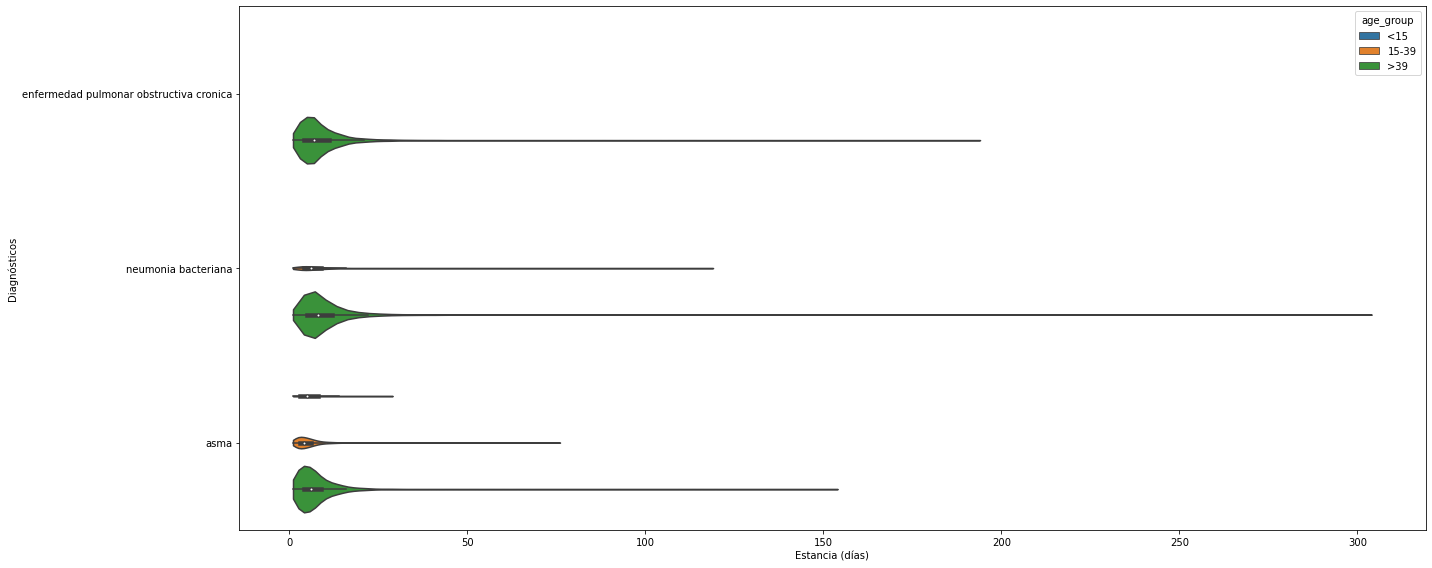

In [147]:
fig, ax = plt.subplots(figsize=(20,8))

diagnosticos_respiratorios = [
    'asma',
    'neumonia bacteriana',
    'enfermedad pulmonar obstructiva cronica'
]

fig = sns.violinplot(
    y = df_reducido.loc[df_reducido.diagnosis_name.isin(diagnosticos_respiratorios), 'diagnosis_name'],
    x = df_reducido.loc[df_reducido.diagnosis_name.isin(diagnosticos_respiratorios), 'estancia'], 
    cut=0,
    hue = df_reducido.age_group, hue_order = ['<15','15-39','>39'],
    scale = 'count', orient= 'h',
    ax = ax
)

plt.ylabel('Diagnósticos')
plt.xlabel('Estancia (días)')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

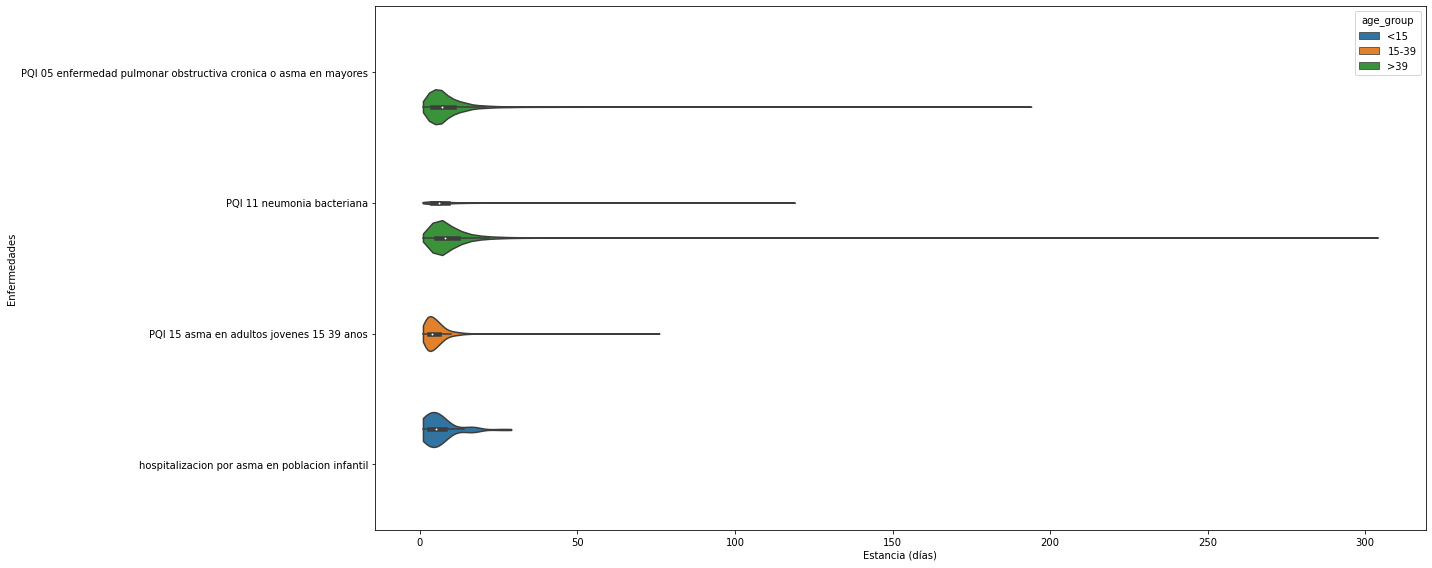

In [148]:
fig, ax = plt.subplots(figsize=(20,8))

enfermedades_respiratorias = [
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores',
    'PQI 11 neumonia bacteriana',
    'PQI 15 asma en adultos jovenes 15 39 anos',
    'hospitalizacion por asma en poblacion infantil'
]

fig = sns.violinplot(
    y = df_reducido.loc[df_reducido.disease_name.isin(enfermedades_respiratorias), 'disease_name'],
    x = df_reducido.loc[df_reducido.disease_name.isin(enfermedades_respiratorias), 'estancia'], 
    cut=0,
    hue = df_reducido.age_group, hue_order = ['<15','15-39','>39'],
    scale = 'count', orient= 'h',
    ax = ax
)

plt.ylabel('Enfermedades')
plt.xlabel('Estancia (días)')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

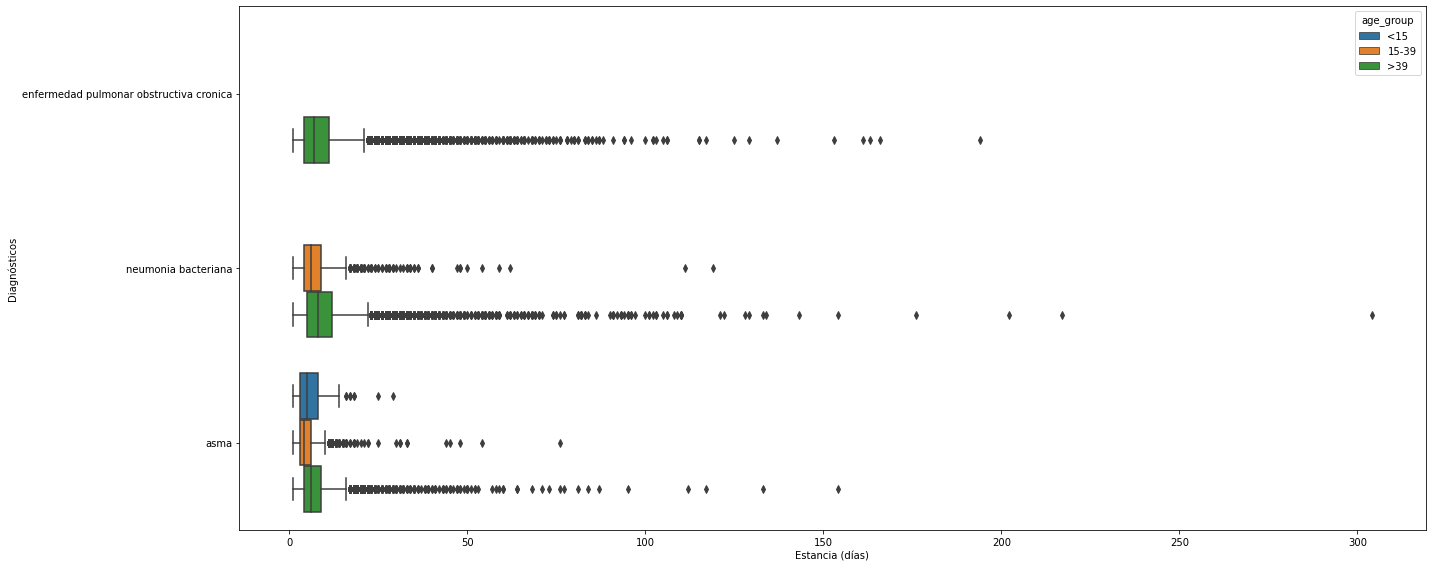

In [149]:
fig, ax = plt.subplots(figsize=(20,8))

diagnosticos_respiratorios = [
    'asma',
    'neumonia bacteriana',
    'enfermedad pulmonar obstructiva cronica'
]

fig = sns.boxplot(
    y = df_reducido.loc[df_reducido.diagnosis_name.isin(diagnosticos_respiratorios), 'diagnosis_name'],
    x = df_reducido.loc[df_reducido.diagnosis_name.isin(diagnosticos_respiratorios), 'estancia'], 
    hue = df_reducido.age_group, hue_order = ['<15','15-39','>39'],
    orient= 'h',
    ax = ax
)

plt.ylabel('Diagnósticos')
plt.xlabel('Estancia (días)')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

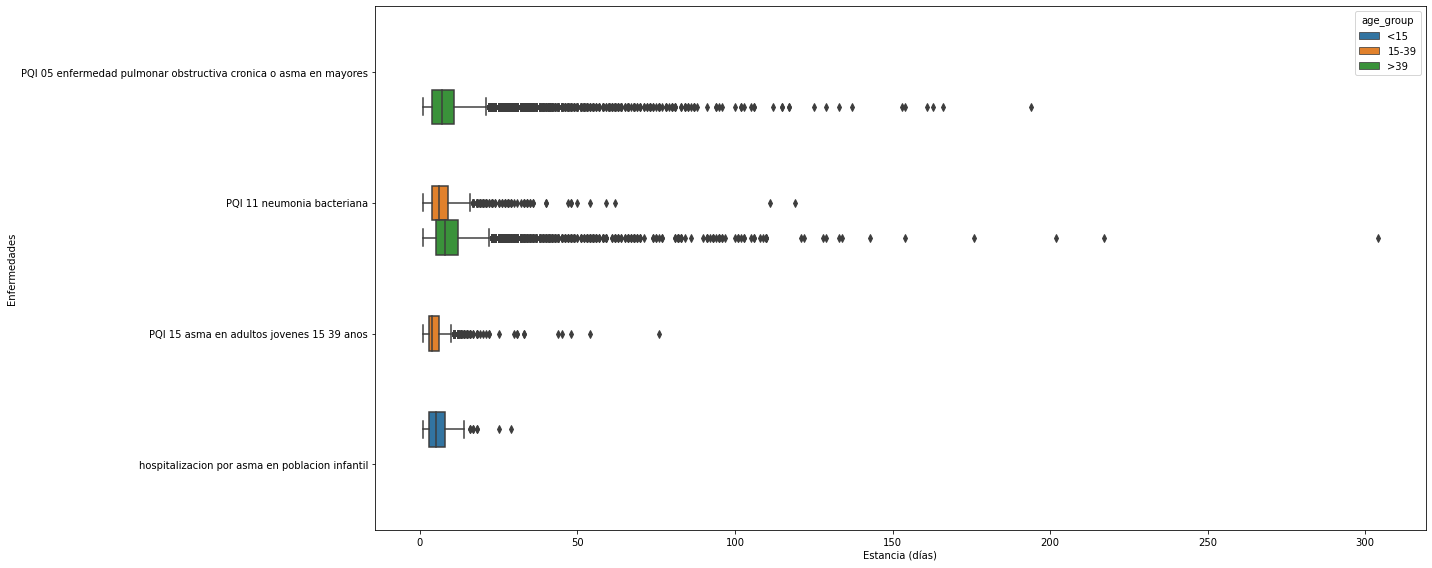

In [151]:
fig, ax = plt.subplots(figsize=(20,8))

enfermedades_respiratorias = [
    'PQI 05 enfermedad pulmonar obstructiva cronica o asma en mayores',
    'PQI 11 neumonia bacteriana',
    'PQI 15 asma en adultos jovenes 15 39 anos',
    'hospitalizacion por asma en poblacion infantil'
]

fig = sns.boxplot(
    y = df_reducido.loc[df_reducido.disease_name.isin(enfermedades_respiratorias), 'disease_name'],
    x = df_reducido.loc[df_reducido.disease_name.isin(enfermedades_respiratorias), 'estancia'], 
    hue = df_reducido.age_group, hue_order = ['<15','15-39','>39'],
    orient= 'h',
    ax = ax
)

plt.ylabel('Enfermedades')
plt.xlabel('Estancia (días)')
# plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## DF Definitivo

In [135]:
df_num_ingresos_diagnostico=df.groupby(['año_ingreso','mes_ingreso','diagnosis_name'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [ ]:
df_num_ingresos=df.groupby(['año_ingreso','mes_ingreso'])['admission_date'].count().reset_index().rename(columns={"admission_date": "numero_de_ingresos"})

In [ ]:
df_num_ingresos['fecha']=df_num_ingresos.año_ingreso.astype('str')+'-'+df_num_ingresos.mes_ingreso.astype('str')

In [ ]:
df_num_ingresos.fecha=pd.to_datetime(df_num_ingresos.fecha,format='%Y-%m')

In [ ]:
df_num_ingresos=df_num_ingresos[['fecha','numero_de_ingresos']]

In [ ]:
df_num_ingresos.numero_de_ingresos=df_num_ingresos.numero_de_ingresos.shift(-1)

In [ ]:
df_num_ingresos.dropna(inplace=True)

In [ ]:
df_num_ingresos

fecha  numero_de_ingresos
0  2007-08-01                 3.0
1  2007-09-01                 3.0
2  2007-10-01                19.0
3  2007-11-01               549.0
4  2007-12-01              1620.0
..        ...                 ...
95 2015-07-01               810.0
96 2015-08-01              1109.0
97 2015-09-01              1384.0
98 2015-10-01              1427.0
99 2015-11-01              1235.0

[100 rows x 2 columns]

In [ ]:
df_num_ingresos_diagnostico['mes_ano']=df_num_ingresos_diagnostico.año_ingreso.astype('str')+'-'+df_num_ingresos_diagnostico.mes_ingreso.astype('str')

In [ ]:
df_num_ingresos_diagnostico.mes_ano=pd.to_datetime(df_num_ingresos_diagnostico.mes_ano,format='%Y-%m')

In [ ]:
df_num_ingresos_diagnostico_pivot=df_num_ingresos_diagnostico.pivot('mes_ano','diagnosis_name','numero_de_ingresos').reset_index()

In [ ]:
df_magnitud.ANO=df_magnitud.ANO.astype('int')
df_magnitud.MES=df_magnitud.MES.astype('int')

In [ ]:
df_merge=df_num_ingresos.merge(df_fin,on=['fecha'],how='inner')

In [ ]:
df_merge.sample(20)

fecha  numero_de_ingresos  CODIGO     ANO   MES      value  \
188 2009-04-01              1475.0      30  2009.0   4.0   0.370968   
23  2007-10-01                19.0      10  2007.0  10.0  26.752688   
799 2014-12-01              2226.0      14  2014.0  12.0  21.509217   
90  2008-06-01              1089.0       1  2008.0   6.0   6.854839   
434 2011-08-01              1205.0       8  2011.0   8.0  33.827957   
884 2015-10-01              1427.0       8  2015.0  10.0  42.154570   
335 2010-09-01              1690.0       8  2010.0   9.0  46.471248   
464 2011-11-01              1778.0      10  2011.0  11.0  19.225806   
264 2010-01-01              1406.0       9  2010.0   1.0  10.096774   
86  2008-05-01              1373.0      10  2008.0   5.0  21.553763   
698 2014-01-01              1468.0      10  2014.0   1.0  13.048387   
624 2013-05-01              1520.0       9  2013.0   5.0   7.940860   
492 2012-02-01              1848.0      12  2012.0   2.0  93.821237   
889 2015-10-01              1427.0      14  2015.0  10.0  32.099078   
752 2014-07-01               817.0      10  2014.0   7.0  21.346774   
656 2013-08-01              1291.0      30  2013.0   8.0   0.467742   
175 2009-03-01              1461.0      10  2009.0   3.0  24.432258   
881 2015-09-01              1384.0      30  2015.0   9.0   0.498925   
204 2009-06-01              1157.0      12  2009.0   6.0  54.699752   
209 2009-07-01              1076.0       8  2009.0   7.0  39.215881   

                   PARTICULA ABREVIATURA  MEDIDA  LIMITE  \
188                  Benceno         BEN  μg/m 3       5   
23    Partículas menor 10 μm        PM10  μg/m 3      50   
799                    Ozono         O3   μg/m 3     120   
90         Dióxido de Azufre         SO3  μg/m 4     500   
434     Dióxido de Nitrógeno         NO3  μg/m 4     400   
884     Dióxido de Nitrógeno         NO3  μg/m 4     400   
335     Dióxido de Nitrógeno         NO3  μg/m 4     400   
464   Partículas menor 10 μm        PM10  μg/m 3      50   
264  Partículas menor 2.5 μm       PM2.5  μg/m 3      25   
86    Partículas menor 10 μm        PM10  μg/m 3      50   
698   Partículas menor 10 μm        PM10  μg/m 3      50   
624  Partículas menor 2.5 μm       PM2.5  μg/m 3      25   
492      Óxidos de Nitrógeno        NOx   μg/m 3      30   
889                    Ozono         O3   μg/m 3     120   
752   Partículas menor 10 μm        PM10  μg/m 3      50   
656                  Benceno         BEN  μg/m 3       5   
175   Partículas menor 10 μm        PM10  μg/m 3      40   
881                  Benceno         BEN  μg/m 3       5   
204      Óxidos de Nitrógeno        NOx   μg/m 3      30   
209     Dióxido de Nitrógeno         NO3  μg/m 4     400   

                                            COMENTARIO  
188                                        Media anual  
23   Media diaria. No podrá superarse en más de 35 ...  
799  Máxima diaria de las medias móviles octohorari...  
90   Alerta. Media horaria durante 3 horas consecut...  
434  Alerta. Media horaria, durante 3 horas consecu...  
884  Alerta. Media horaria, durante 3 horas consecu...  
335  Alerta. Media horaria, durante 3 horas consecu...  
464  Media diaria. No podrá superarse en más de 35 ...  
264                                        Media anual  
86   Media diaria. No podrá superarse en más de 35 ...  
698  Media diaria. No podrá superarse en más de 35 ...  
624                                        Media anual  
492                             Afecta a la vegetación  
889  Máxima diaria de las medias móviles octohorari...  
752  Media diaria. No podrá superarse en más de 35 ...  
656                                        Media anual  
175                           Límite en la media anual  
881                                        Media anual  
204                             Afecta a la vegetación  
209  Alerta. Media horaria, durante 3 horas consecu...

In [ ]:
px.line(df_merge,x='fecha',y=['value','LIMITE'],color='PARTICULA')

In [ ]:
df_merge.drop(['COMENTARIO','ABREVIATURA','MEDIDA','ANO','MES'],axis=1,inplace=True)

In [ ]:
df_merge.head(10)

fecha  numero_de_ingresos  CODIGO      value                PARTICULA  \
0 2007-08-01                 3.0       1   6.366935        Dióxido de Azufre   
1 2007-08-01                 3.0       6   0.234677      Monóxido de Carbono   
2 2007-08-01                 3.0       8  30.892473     Dióxido de Nitrógeno   
3 2007-08-01                 3.0       9  14.887097  Partículas menor 2.5 μm   
4 2007-08-01                 3.0      10  34.865591   Partículas menor 10 μm   
5 2007-08-01                 3.0      10  34.865591   Partículas menor 10 μm   
6 2007-08-01                 3.0      12  46.169355      Óxidos de Nitrógeno   
7 2007-08-01                 3.0      14  59.720430                    Ozono   
8 2007-08-01                 3.0      30   0.375806                  Benceno   
9 2007-09-01                 3.0       1   5.955645        Dióxido de Azufre   

   LIMITE  
0     500  
1      10  
2     400  
3      25  
4      40  
5      50  
6      30  
7     120  
8       5  
9     500

In [ ]:
df_def=pd.pivot_table(df_merge,index='fecha',columns='PARTICULA',values='value').reset_index().merge(df_num_ingresos,on='fecha',how='left').merge(df_temperatura,on='fecha',how='left')

In [ ]:
df_def[diagnosticos[:-1]]=df_def[diagnosticos[:-1]].shift(-1)

In [ ]:
df_def['Benceno_1_mes']=df_def.Benceno.shift()
df_def['Benceno_2_meses']=df_def.Benceno.shift(2)
df_def['Benceno_3_meses']=df_def.Benceno.shift(3)
df_def['DióxidodDeAzufre_1_mes']=df_def['Dióxido de Azufre'].shift()
df_def['DióxidodDeAzufre_2_meses']=df_def['Dióxido de Azufre'].shift(2)
df_def['DióxidodDeAzufre_3_meses']=df_def['Dióxido de Azufre'].shift(3)
df_def['Ozono_1_mes']=df_def.Ozono.shift()
df_def['Ozono_2_meses']=df_def.Ozono.shift(2)
df_def['Ozono_3_meses']=df_def.Ozono.shift(3)
df_def['DióxidodDeNitrogeno_1_mes']=df_def['Dióxido de Nitrógeno'].shift()
df_def['DióxidodDeNitrogeno_2_meses']=df_def['Dióxido de Nitrógeno'].shift(2)
df_def['DióxidodDeNitrogeno_3_meses']=df_def['Dióxido de Nitrógeno'].shift(3)
df_def['MonoxidoDeCarbono_1_mes']=df_def['Monóxido de Carbono'].shift()
df_def['MonoxidoDeCarbono_2_meses']=df_def['Monóxido de Carbono'].shift(2)
df_def['MonoxidoDeCarbono_3_meses']=df_def['Monóxido de Carbono'].shift(3)
df_def['OxidosDeNitrogeno_1_mes']=df_def['Óxidos de Nitrógeno'].shift()
df_def['OxidosDeNitrogeno_2_meses']=df_def['Óxidos de Nitrógeno'].shift(2)
df_def['OxidosDeNitrogeno_3_meses']=df_def['Óxidos de Nitrógeno'].shift(3)
df_def['Particulas10_1_mes']=df_def['Partículas menor 10 μm'].shift()
df_def['Particulas10_2_meses']=df_def['Partículas menor 10 μm'].shift(2)
df_def['Particulas10_3_meses']=df_def['Partículas menor 10 μm'].shift(3)
df_def['Particulas2.5_1_mes']=df_def['Partículas menor 2.5 μm'].shift()
df_def['Particulas2.5_2_meses']=df_def['Partículas menor 2.5 μm'].shift(2)
df_def['Particulas2.5_3_meses']=df_def['Partículas menor 2.5 μm'].shift(3)
df_def['ingresos_año_anterior']=df_def.numero_de_ingresos.shift(12)
df_def['mes']=df_def.fecha.dt.month

In [570]:
df_def=pd.read_csv('data/df_definitivo.csv',parse_dates=['fecha'])
df_def_diagnosticos=pd.read_csv('data/df_definitivo_por_diagnosticos.csv',parse_dates=['fecha'])

## Modelos por número de ingresos totales

## XGBoost

In [745]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','ingresos_año_anterior','mes']
columns_y='numero_de_ingresos'
limite='2014-12-01'

X_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_X]
y_train=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha<=limite)][columns_y]
X_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_X]
y_test=df_def[ (~df_def[columns_y].isna()) & (df_def.fecha>limite)][columns_y]

In [572]:
df_num_ingresos=df_def[['fecha','numero_de_ingresos']]

In [790]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [791]:
model1=XGBRegressor()

In [792]:
cv = RandomizedSearchCV(model1, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [793]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [794]:
cv.best_score_,cv.best_params_

(0.43167554479701725,
 {'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1})

In [795]:
t = time.perf_counter()
final_model_xgb = XGBRegressor(**cv.best_params_)
final_model_xgb.fit(    X_train, y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

[0]	validation_0-rmse:1333.34228	validation_1-rmse:1192.75537
[1]	validation_0-rmse:1205.36060	validation_1-rmse:1072.41077
[2]	validation_0-rmse:1090.22180	validation_1-rmse:964.16486
[3]	validation_0-rmse:986.86597	validation_1-rmse:858.26349
[4]	validation_0-rmse:893.59906	validation_1-rmse:772.15698
[5]	validation_0-rmse:809.71582	validation_1-rmse:693.06946
[6]	validation_0-rmse:734.11023	validation_1-rmse:620.89386
[7]	validation_0-rmse:666.07233	validation_1-rmse:554.15210
[8]	validation_0-rmse:604.98334	validation_1-rmse:495.19873
[9]	validation_0-rmse:549.82520	validation_1-rmse:449.96906
[10]	validation_0-rmse:499.98102	validation_1-rmse:402.01123
[11]	validation_0-rmse:455.08652	validation_1-rmse:357.23962
[12]	validation_0-rmse:414.39603	validation_1-rmse:323.25522
[13]	validation_0-rmse:377.70947	validation_1-rmse:296.75012
[14]	validation_0-rmse:344.37448	validation_1-rmse:274.52173
[15]	validation_0-rmse:314.45645	validation_1-rmse:252.59393
[16]	validation_0-rmse:286.94

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [796]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.404911


Text(0.5, 1.0, 'Feature Importance')

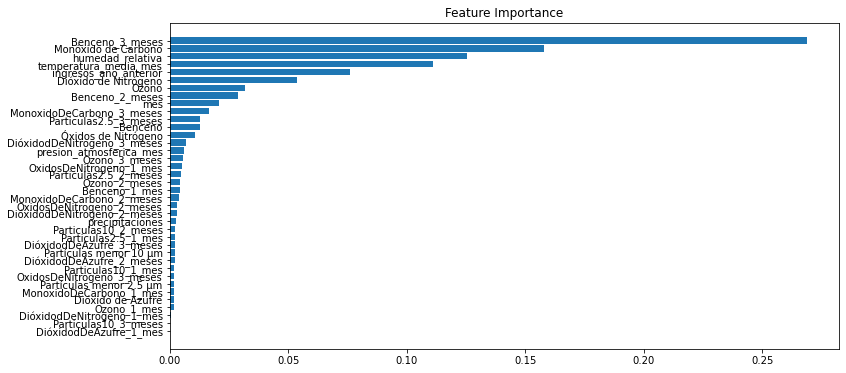

In [580]:
feature_importance = final_model_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [797]:
preds0=final_model_xgb.predict(X_train)
preds1=final_model_xgb.predict(X_test)

In [798]:
rmse_xgb_train,mae_xgb_train,mape_xgb_train=np.sqrt(mean_squared_error(preds0,y_train)),mean_absolute_error(preds0,y_train),mean_absolute_percentage_error(preds0,y_train)
rmse_xgb_test, mae_xgb_test,mape_xgb_test=np.sqrt(mean_squared_error(preds1,y_test)),mean_absolute_error(preds1,y_test),mean_absolute_percentage_error(preds1,y_test)

In [799]:
errores_xgb_train=[ mae_xgb_train,mape_xgb_train,rmse_xgb_train]
errores_xgb_test=[ mae_xgb_test,mape_xgb_test,rmse_xgb_test]

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



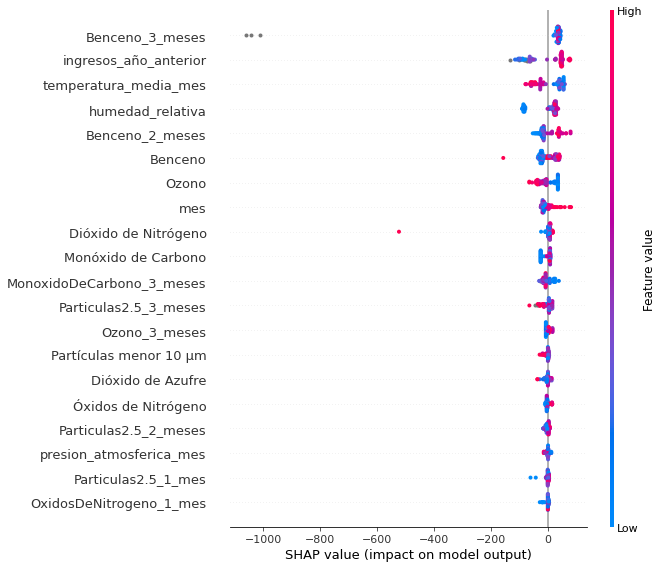

In [584]:
explainer = shap.TreeExplainer(final_model_xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [800]:
df_num_ingresos['predicciones_xgb']=final_model_xgb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/1948407400.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost

In [776]:
model2=CatBoostRegressor()

In [777]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [778]:
cv = RandomizedSearchCV(model2, param_grid, cv = 5, verbose = True, n_jobs = -1)

In [779]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan         nan  0.06039457         nan -0.15463536         nan
  0.288043    0.4181717   0.36715694         nan]



0:	learn: 384.7300842	total: 27.5ms	remaining: 5.47s
1:	learn: 370.7001193	total: 72.3ms	remaining: 7.16s
2:	learn: 357.4299673	total: 121ms	remaining: 7.98s
3:	learn: 342.5274400	total: 172ms	remaining: 8.43s
4:	learn: 328.2834286	total: 227ms	remaining: 8.87s
5:	learn: 315.6480408	total: 302ms	remaining: 9.77s
6:	learn: 304.3191548	total: 376ms	remaining: 10.4s
7:	learn: 293.1799600	total: 453ms	remaining: 10.9s
8:	learn: 284.5893914	total: 516ms	remaining: 11s
9:	learn: 275.0182406	total: 591ms	remaining: 11.2s
10:	learn: 266.0051507	total: 659ms	remaining: 11.3s
11:	learn: 256.8815785	total: 689ms	remaining: 10.8s
12:	learn: 250.6837087	total: 743ms	remaining: 10.7s
13:	learn: 242.2913672	total: 812ms	remaining: 10.8s
14:	learn: 235.0193428	total: 875ms	remaining: 10.8s
15:	learn: 227.1323925	total: 947ms	remaining: 10.9s
16:	learn: 219.9717498	total: 1.12s	remaining: 12s
17:	learn: 212.5887483	total: 1.23s	remaining: 12.4s
18:	learn: 206.4996488	total: 1.26s	remaining: 12s
19:	lea

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000027C3D09FD60>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]},
                   verbose=True)

In [780]:
cv.best_score_,cv.best_params_

(0.4181716997963874, {'learning_rate': 0.1, 'iterations': 200, 'depth': 10})

In [781]:
final_model_cb=CatBoostRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_cb.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=5)

0:	learn: 384.7300842	test: 384.7300842	test1: 272.2065784	best: 272.2065784 (0)	total: 78ms	remaining: 15.5s
1:	learn: 370.7001193	test: 370.7001193	test1: 261.1577429	best: 261.1577429 (1)	total: 173ms	remaining: 17.2s
2:	learn: 357.4299673	test: 357.4299673	test1: 252.7133685	best: 252.7133685 (2)	total: 249ms	remaining: 16.3s
3:	learn: 342.5274400	test: 342.5274400	test1: 245.5844108	best: 245.5844108 (3)	total: 296ms	remaining: 14.5s
4:	learn: 328.2834286	test: 328.2834286	test1: 242.6894845	best: 242.6894845 (4)	total: 364ms	remaining: 14.2s
5:	learn: 315.6480408	test: 315.6480408	test1: 234.5517339	best: 234.5517339 (5)	total: 414ms	remaining: 13.4s
6:	learn: 304.3191548	test: 304.3191548	test1: 224.2123348	best: 224.2123348 (6)	total: 482ms	remaining: 13.3s
7:	learn: 293.1799600	test: 293.1799600	test1: 215.9946323	best: 215.9946323 (7)	total: 550ms	remaining: 13.2s
8:	learn: 284.5893914	test: 284.5893914	test1: 209.9477926	best: 209.9477926 (8)	total: 636ms	remaining: 13.5s
9:

In [782]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:04.028840


Text(0.5, 1.0, 'Feature Importance')

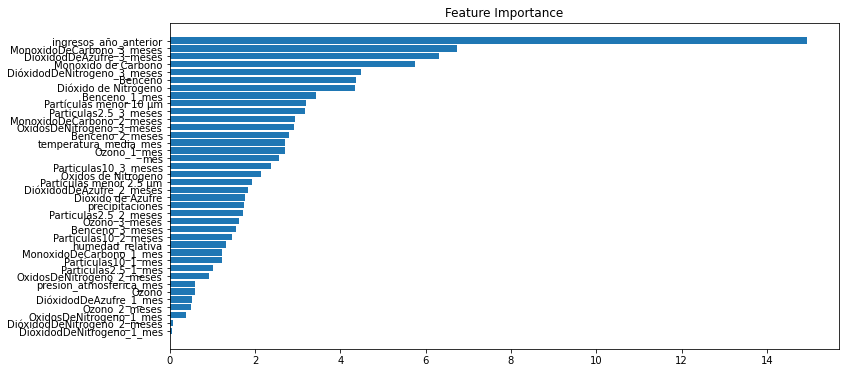

In [773]:
feature_importance = final_model_cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [783]:
pred3=final_model_cb.predict(X_train)
pred2=final_model_cb.predict(X_test)

In [784]:
mae_cb_train,mape_cb_train,rmse_cb_train=mean_absolute_error(pred3,y_train),mean_absolute_percentage_error(pred3,y_train),np.sqrt(mean_squared_error(pred3,y_train))
mae_cb_test,mape_cb_test,rmse_cb_test=mean_absolute_error(pred2,y_test),mean_absolute_percentage_error(pred2,y_test),np.sqrt(mean_squared_error(pred2,y_test))

In [785]:
errores_cb_train=[mae_cb_train,mape_cb_train,rmse_cb_train]
errores_cb_test=[mae_cb_test,mape_cb_test,rmse_cb_test]

In [788]:
errores_cb_test

[102.04387961248676, 0.07656412187204838, 142.28899346511355]

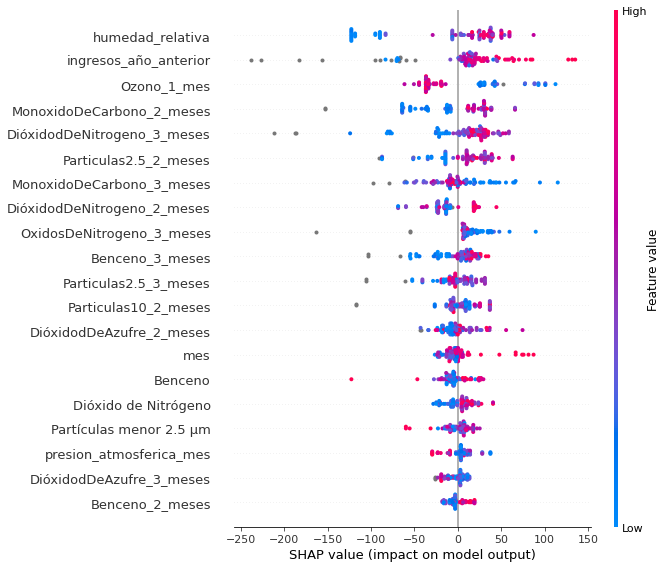

In [597]:
explainer = shap.TreeExplainer(final_model_cb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [789]:
df_num_ingresos['predicciones_cb']=final_model_cb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/281832746.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM

In [599]:
model3=LGBMRegressor()

In [600]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [601]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [602]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [603]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 20, 'learning_rate': 0.01},
 0.40421026973051993)

In [604]:
final_model_lgb=LGBMRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_lgb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=20, num_iterations=200)

In [605]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.723325


Text(0.5, 1.0, 'Feature Importance')

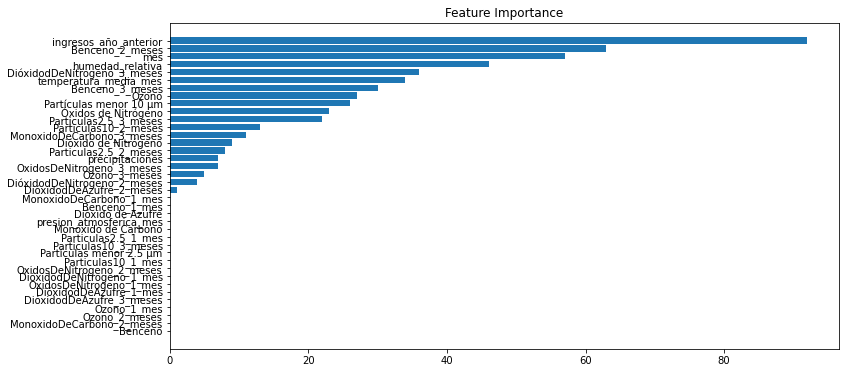

In [606]:
feature_importance = final_model_lgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [607]:
pred5=final_model_lgb.predict(X_train)
pred4=final_model_lgb.predict(X_test)

In [767]:
mae_lgb_train,mape_lgb_train,rmse_lgb_train=mean_absolute_error(pred5,y_train),mean_absolute_percentage_error(pred5,y_train),np.sqrt(mean_squared_error(pred5,y_train))
mae_lgb_test,mape_lgb_test,rmse_lgb_test=mean_absolute_error(pred4,y_test),mean_absolute_percentage_error(pred4,y_test),np.sqrt(mean_squared_error(pred4,y_test))

In [609]:
errores_lgb_train=[mae_lgb_train,mape_lgb_train,rmse_lgb_train]
errores_lgb_test=[mae_lgb_test,mape_lgb_test,rmse_lgb_test]

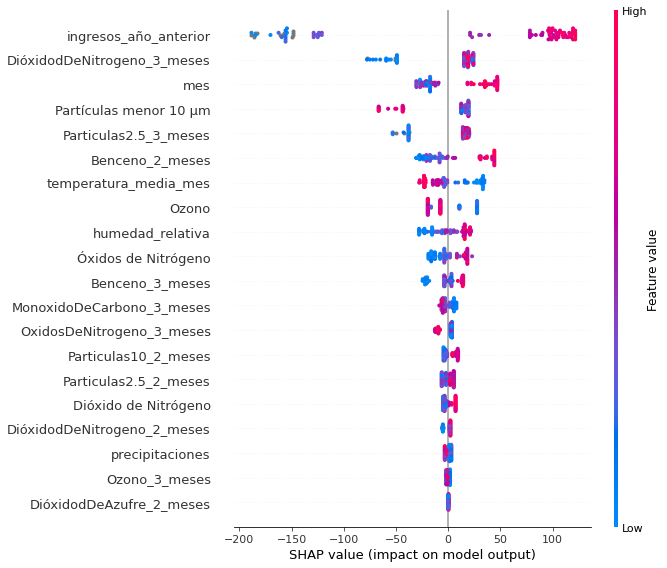

In [610]:
explainer = shap.TreeExplainer(final_model_lgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [801]:
df_errores_train=pd.DataFrame({'errores_xgb':errores_xgb_train,'errores_cb':errores_cb_train,'errores_lgb':errores_lgb_train},index=['MAE','MAPE','RMSE'])
df_errores_test=pd.DataFrame({'errores_xgb':errores_xgb_test,'errores_cb':errores_cb_test,'errores_lgb':errores_lgb_test},index=['MAE','MAPE','RMSE'])

In [769]:
df_num_ingresos['predicciones_lgbm']=final_model_lgb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/3366779243.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [802]:
px.line(df_num_ingresos,x='fecha',y=['predicciones_lgbm','predicciones_cb','predicciones_xgb','numero_de_ingresos'])

In [803]:
df_errores_train

errores_xgb  errores_cb  errores_lgb
MAE     83.301387   59.786660   130.759265
MAPE     0.063799    0.070923     0.103097
RMSE   101.582835   82.041303   232.547220

In [804]:
df_errores_test

errores_xgb  errores_cb  errores_lgb
MAE    126.231961  102.043880    83.508833
MAPE     0.095404    0.076564     0.063817
RMSE   161.730615  142.288993   129.106402

## Estimación por diagnosticos: Enfermedad pulmonar obstructiva crónica (epoc), asma (a) y neumonia bacteriana (nb)

## XGBoost para enfermedad pulmonar obstructiva cronica

In [808]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','epoc_año_anterior','mes']
columns_y='enfermedad pulmonar obstructiva cronica'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [809]:
df_num_ingresos_epoc=df_def_diagnosticos[['fecha','enfermedad pulmonar obstructiva cronica']]

In [810]:
df_num_ingresos_epoc.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/2224907365.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [811]:
model1=XGBRegressor()

In [812]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [813]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [814]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [815]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.4186073152259812)

In [816]:
final_model_xgb_epoc=XGBRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_xgb_epoc.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

[0]	validation_0-rmse:328.80789	validation_1-rmse:330.84946
[1]	validation_0-rmse:297.97946	validation_1-rmse:305.26883
[2]	validation_0-rmse:270.25665	validation_1-rmse:282.66840
[3]	validation_0-rmse:245.28104	validation_1-rmse:257.64770
[4]	validation_0-rmse:222.72147	validation_1-rmse:234.22827
[5]	validation_0-rmse:202.36469	validation_1-rmse:218.87247
[6]	validation_0-rmse:183.86879	validation_1-rmse:203.47111
[7]	validation_0-rmse:167.26181	validation_1-rmse:189.35620
[8]	validation_0-rmse:152.33524	validation_1-rmse:176.18195
[9]	validation_0-rmse:138.81015	validation_1-rmse:165.30417
[10]	validation_0-rmse:126.51415	validation_1-rmse:154.51955
[11]	validation_0-rmse:115.48071	validation_1-rmse:143.51382
[12]	validation_0-rmse:105.58540	validation_1-rmse:136.95538
[13]	validation_0-rmse:96.57355	validation_1-rmse:131.19040
[14]	validation_0-rmse:88.42926	validation_1-rmse:125.64014
[15]	validation_0-rmse:81.02266	validation_1-rmse:120.47102
[16]	validation_0-rmse:74.27646	valid

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [817]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.768758


Text(0.5, 1.0, 'Feature Importance')

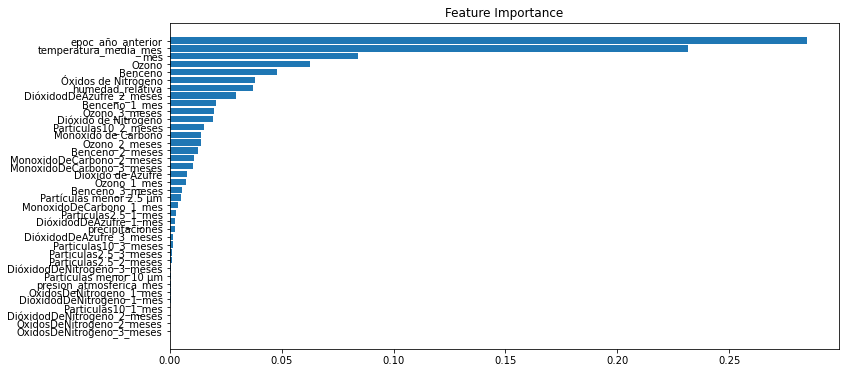

In [818]:
feature_importance = final_model_xgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



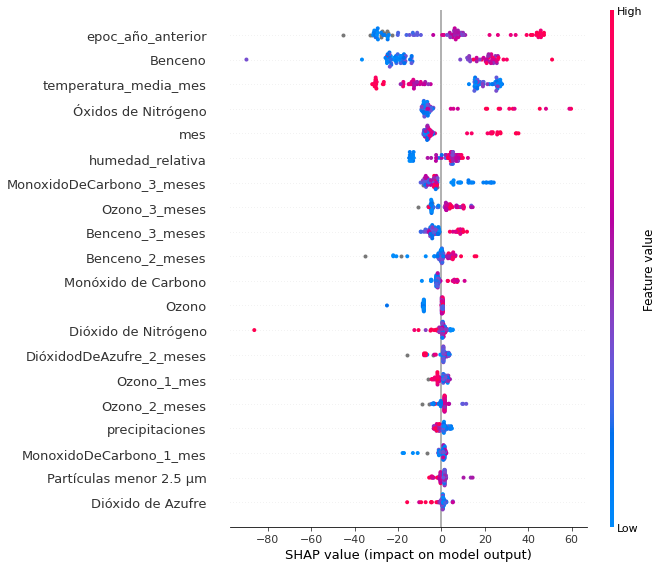

In [819]:
explainer = shap.TreeExplainer(final_model_xgb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [820]:
pred0_epoc=final_model_xgb_epoc.predict(X_train)
pred1_epoc=final_model_xgb_epoc.predict(X_test)

In [821]:
mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train=mean_absolute_error(pred0_epoc,y_train),mean_absolute_percentage_error(pred0_epoc,y_train),np.sqrt(mean_squared_error(pred0_epoc,y_train))
mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test=mean_absolute_error(pred1_epoc,y_test),mean_absolute_percentage_error(pred1_epoc,y_test),np.sqrt(mean_squared_error(pred1_epoc,y_test))

In [822]:
errores_xgb_epoc_train=[mae_xgb_epoc_train,mape_xgb_epoc_train,rmse_xgb_epoc_train]
errores_xgb_epoc_test=[mae_xgb_epoc_test,mape_xgb_epoc_test,rmse_xgb_epoc_test]

In [823]:
df_num_ingresos_epoc['predicciones_xgb']=final_model_xgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/4194797343.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para enfermedad pulmonar obstructiva cronica

In [824]:
model2=CatBoostRegressor()

In [825]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [826]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [827]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.0611045   0.5365143          nan -0.16045516  0.23999201         nan
 -0.17062042  0.3364769   0.26105075  0.4410044 ]



0:	learn: 102.6753082	total: 7.53ms	remaining: 745ms
1:	learn: 98.3489304	total: 10.3ms	remaining: 504ms
2:	learn: 93.5595682	total: 13.1ms	remaining: 422ms
3:	learn: 89.5648539	total: 17.6ms	remaining: 422ms
4:	learn: 85.5155154	total: 22ms	remaining: 417ms
5:	learn: 82.0415164	total: 24.8ms	remaining: 388ms
6:	learn: 78.1521096	total: 28.5ms	remaining: 378ms
7:	learn: 75.4756252	total: 32.1ms	remaining: 370ms
8:	learn: 72.9108864	total: 35ms	remaining: 354ms
9:	learn: 70.2656889	total: 39.3ms	remaining: 354ms
10:	learn: 67.5975079	total: 43.8ms	remaining: 355ms
11:	learn: 64.8698341	total: 48.1ms	remaining: 353ms
12:	learn: 62.9182643	total: 54.1ms	remaining: 362ms
13:	learn: 60.6820191	total: 57.7ms	remaining: 355ms
14:	learn: 58.9048031	total: 61.5ms	remaining: 348ms
15:	learn: 57.1385466	total: 66.5ms	remaining: 349ms
16:	learn: 55.5424238	total: 70.1ms	remaining: 342ms
17:	learn: 53.7481745	total: 73.3ms	remaining: 334ms
18:	learn: 52.0176589	total: 78.6ms	remaining: 335ms
19:	le

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000027C431888B0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [828]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 100, 'depth': 5}, 0.5365142987631994)

In [829]:
final_model_cb_epoc=CatBoostRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_cb_epoc.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

0:	learn: 102.6753082	test: 102.6753082	test1: 85.1203032	best: 85.1203032 (0)	total: 8.17ms	remaining: 809ms
1:	learn: 98.3489304	test: 98.3489304	test1: 80.5155352	best: 80.5155352 (1)	total: 15.1ms	remaining: 738ms
2:	learn: 93.5595682	test: 93.5595682	test1: 76.9330553	best: 76.9330553 (2)	total: 21.7ms	remaining: 702ms
3:	learn: 89.5648539	test: 89.5648539	test1: 75.4630501	best: 75.4630501 (3)	total: 28ms	remaining: 672ms
4:	learn: 85.5155154	test: 85.5155154	test1: 72.7015456	best: 72.7015456 (4)	total: 34.9ms	remaining: 663ms
5:	learn: 82.0415164	test: 82.0415164	test1: 71.3516199	best: 71.3516199 (5)	total: 41.1ms	remaining: 643ms
6:	learn: 78.1521096	test: 78.1521096	test1: 69.8156048	best: 69.8156048 (6)	total: 49.1ms	remaining: 652ms
7:	learn: 75.4756252	test: 75.4756252	test1: 68.5831594	best: 68.5831594 (7)	total: 55.4ms	remaining: 637ms
8:	learn: 72.9108864	test: 72.9108864	test1: 67.9215610	best: 67.9215610 (8)	total: 75.1ms	remaining: 760ms
9:	learn: 70.2656889	test: 7

In [830]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:01.011258


Text(0.5, 1.0, 'Feature Importance')

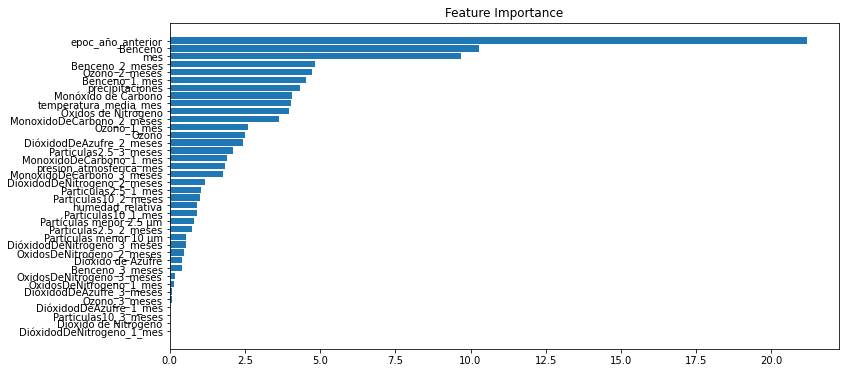

In [831]:
feature_importance = final_model_cb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

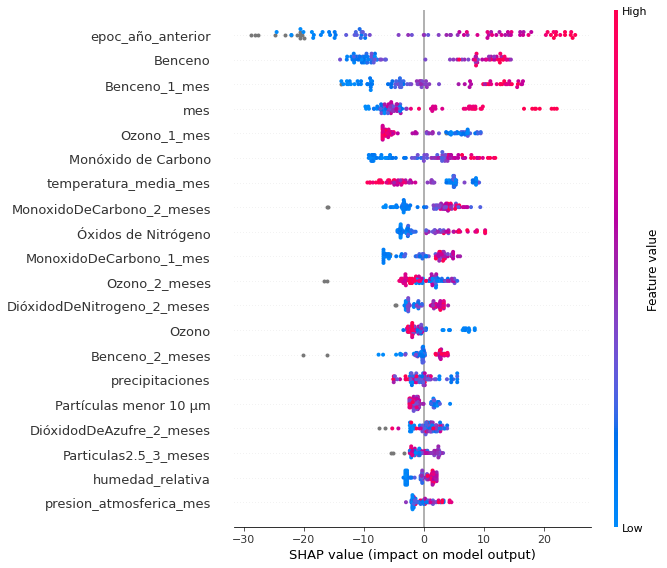

In [832]:
explainer = shap.TreeExplainer(final_model_cb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [833]:
pred3_epoc=final_model_cb_epoc.predict(X_train)
pred2_epoc=final_model_cb_epoc.predict(X_test)

In [834]:
mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train=mean_absolute_error(pred3_epoc,y_train),mean_absolute_percentage_error(pred3_epoc,y_train),np.sqrt(mean_squared_error(pred3_epoc,y_train))
mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test=mean_absolute_error(pred2_epoc,y_test),mean_absolute_percentage_error(pred2_epoc,y_test),np.sqrt(mean_squared_error(pred2_epoc,y_test))

In [835]:
errores_cb_epoc_train=[mae_cb_epoc_train,mape_cb_epoc_train,rmse_cb_epoc_train]
errores_cb_epoc_test=[mae_cb_epoc_test,mape_cb_epoc_test,rmse_cb_epoc_test]

In [836]:
df_num_ingresos_epoc['predicciones_cb']=final_model_cb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/3182482037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para enfermedad pulmonar obstructiva cronica

In [837]:
model3=LGBMRegressor()

In [838]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [839]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [840]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [841]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 10, 'learning_rate': 0.1},
 0.48212390128694305)

In [842]:
final_model_lgb_epoc=LGBMRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_lgb_epoc.fit(X_train,y_train)

LGBMRegressor(max_depth=10, num_iterations=200)

In [843]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.305625


Text(0.5, 1.0, 'Feature Importance')

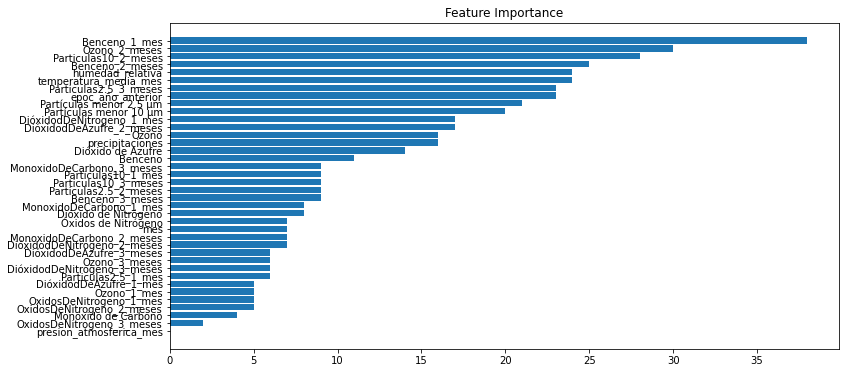

In [844]:
feature_importance = final_model_lgb_epoc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

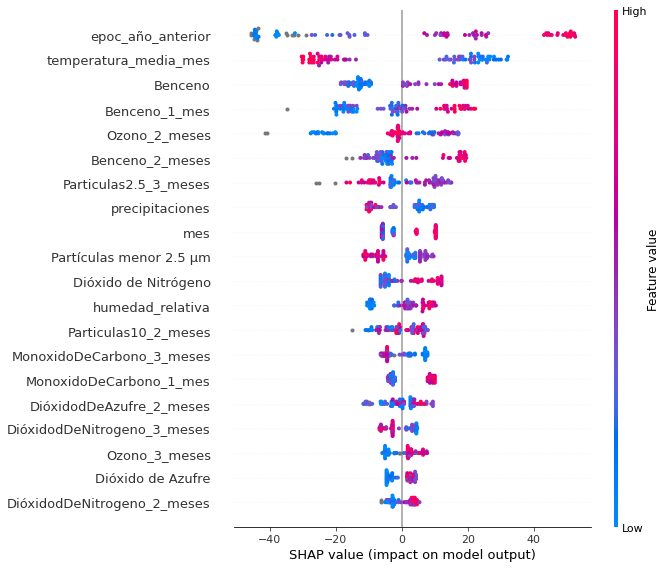

In [845]:
explainer = shap.TreeExplainer(final_model_lgb_epoc)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [846]:
pred5_epoc=final_model_lgb_epoc.predict(X_train)
pred4_epoc=final_model_lgb_epoc.predict(X_test)

In [847]:
mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train=mean_absolute_error(pred5_epoc,y_train),mean_absolute_percentage_error(pred5_epoc,y_train),np.sqrt(mean_squared_error(pred5_epoc,y_train))
mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test=mean_absolute_error(pred4_epoc,y_test),mean_absolute_percentage_error(pred4_epoc,y_test),np.sqrt(mean_squared_error(pred4_epoc,y_test))

In [848]:
errores_lgb_epoc_train=[mae_lgb_epoc_train,mape_lgb_epoc_train,rmse_lgb_epoc_train]
errores_lgb_epoc_test=[mae_lgb_epoc_test,mape_lgb_epoc_test,rmse_lgb_epoc_test]

In [849]:
df_errores_epoc_train=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_train,'errores_cb_epoc':errores_cb_epoc_train,'errores_lgb_epoc':errores_lgb_epoc_train},index=['MAE','MAPE','RMSE'])
df_errores_epoc_test=pd.DataFrame({'errores_xgb_epoc':errores_xgb_epoc_test,'errores_cb_epoc':errores_cb_epoc_test,'errores_lgb_epoc':errores_lgb_epoc_test},index=['MAE','MAPE','RMSE'])

In [850]:
df_errores_epoc_train

errores_xgb_epoc  errores_cb_epoc  errores_lgb_epoc
MAE           1.398470        31.196082          7.633358
MAPE          0.006694         0.097649          0.030747
RMSE          2.544238        41.545573         11.740734

In [851]:
df_errores_epoc_test

errores_xgb_epoc  errores_cb_epoc  errores_lgb_epoc
MAE          56.976016        51.319560         43.747310
MAPE          0.167607         0.146463          0.127932
RMSE         83.531125        58.404761         59.260113

In [852]:
df_num_ingresos_epoc['predicciones_lgbm']=final_model_lgb_epoc.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/2543625712.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [853]:
px.line(df_num_ingresos_epoc,x='fecha',y=['enfermedad pulmonar obstructiva cronica','predicciones_xgb',	'predicciones_cb',	'predicciones_lgbm'])

## XGBoost para neumonia bacteriana

In [854]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','nb_año_anterior','mes']
columns_y='neumonia bacteriana'

limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [855]:
df_num_ingresos_nb=df_def_diagnosticos[['fecha','neumonia bacteriana']]

In [856]:
df_num_ingresos_nb.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/2118254318.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [857]:
model1=XGBRegressor()

In [858]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [859]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [860]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [861]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.1386933734761778)

In [862]:
final_model_xgb_nb=XGBRegressor(random_state=42, min_sample_split = 20,**cv.best_params_)
t=time.perf_counter()
final_model_xgb_nb.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

[19:15:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:187.48399	validation_1-rmse:185.23694
[1]	validation_0-rmse:170.00267	validation_1-rmse:168.64711
[2]	validation_0-rmse:154.23610	validation_1-rmse:152.04533
[3]	validation_0-rmse:139.97563	validation_1-rmse:138.40134
[4]	validation_0-rmse:127.19072	validation_1-rmse:125.19151
[5]	validation_0-rmse:115.64311	validation_1-rmse:115.28968
[6]	validation_0-rmse:105.16715	validation_1-rmse:105.09232
[7]	validation_0-rmse:95.71003	validation_1-rmse:97.46997
[8]	validation_0-rmse:87.19346	validation_1-rmse:90.54225
[9]	validation_0-rmse:79.51166	validation_1-rmse:82.97206
[1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [863]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.786629


Text(0.5, 1.0, 'Feature Importance')

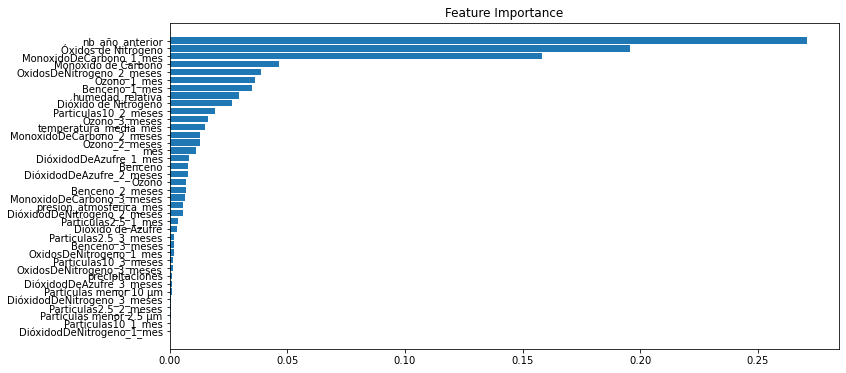

In [864]:
feature_importance = final_model_xgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



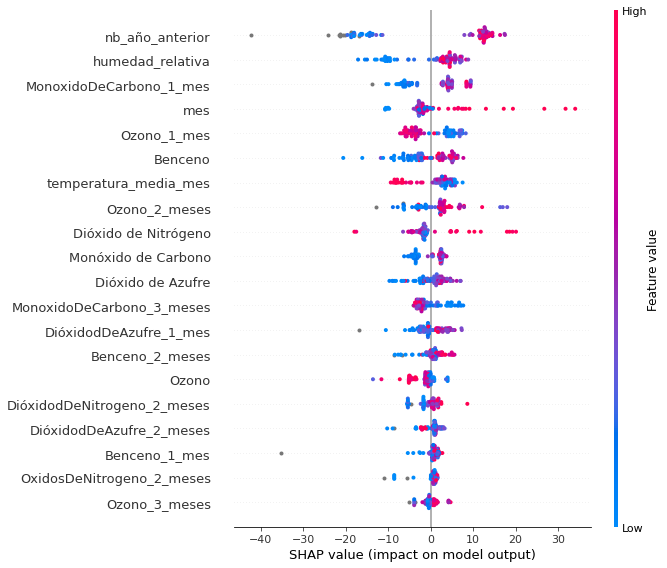

In [865]:
explainer = shap.TreeExplainer(final_model_xgb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [866]:
pred0_nb=final_model_xgb_nb.predict(X_train)
pred1_nb=final_model_xgb_nb.predict(X_test)

In [867]:
mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train=mean_absolute_error(pred0_nb,y_train),mean_absolute_percentage_error(pred0_nb,y_train),np.sqrt(mean_squared_error(pred0_nb,y_train))
mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test=mean_absolute_error(pred1_nb,y_test),mean_absolute_percentage_error(pred1_nb,y_test),np.sqrt(mean_squared_error(pred1_nb,y_test))

In [868]:
errores_xgb_nb_train=[mae_xgb_nb_train,mape_xgb_nb_train,rmse_xgb_nb_train]
errores_xgb_nb_test=[mae_xgb_nb_test,mape_xgb_nb_test,rmse_xgb_nb_test]

In [869]:
df_num_ingresos_nb['predicciones_xgb']=final_model_xgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/685724751.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Catboost para neumonia bacteriana

In [870]:
model2=CatBoostRegressor()

In [871]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [872]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [873]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [        nan         nan         nan -0.06716033         nan  0.07776507
  0.34610923         nan -0.1556542   0.16370448]



0:	learn: 59.1004786	total: 8.67ms	remaining: 1.73s
1:	learn: 58.8404738	total: 13.9ms	remaining: 1.38s
2:	learn: 58.5781654	total: 18.1ms	remaining: 1.19s
3:	learn: 58.3452104	total: 21.1ms	remaining: 1.03s
4:	learn: 58.0935157	total: 24.7ms	remaining: 964ms
5:	learn: 57.8573208	total: 28ms	remaining: 906ms
6:	learn: 57.5703579	total: 30.7ms	remaining: 846ms
7:	learn: 57.3538252	total: 35.3ms	remaining: 847ms
8:	learn: 57.1062238	total: 39ms	remaining: 827ms
9:	learn: 56.9264080	total: 41.4ms	remaining: 786ms
10:	learn: 56.7144139	total: 44.1ms	remaining: 758ms
11:	learn: 56.4520799	total: 49ms	remaining: 767ms
12:	learn: 56.2284489	total: 52.2ms	remaining: 750ms
13:	learn: 55.9709468	total: 55.7ms	remaining: 740ms
14:	learn: 55.7432717	total: 58.6ms	remaining: 723ms
15:	learn: 55.5059232	total: 61.5ms	remaining: 707ms
16:	learn: 55.2497437	total: 65.8ms	remaining: 708ms
17:	learn: 55.0356570	total: 69.2ms	remaining: 700ms
18:	learn: 54.7959234	total: 72.8ms	remaining: 694ms
19:	learn

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000027C3CEBE730>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [874]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.01, 'iterations': 200, 'depth': 5}, 0.34610923023963236)

In [875]:
final_model_cb_nb=CatBoostRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_cb_nb.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

0:	learn: 59.1004786	test: 59.1004786	test1: 55.9357013	best: 55.9357013 (0)	total: 4.14ms	remaining: 825ms
1:	learn: 58.8404738	test: 58.8404738	test1: 55.6359333	best: 55.6359333 (1)	total: 8.37ms	remaining: 828ms
2:	learn: 58.5781654	test: 58.5781654	test1: 55.4486108	best: 55.4486108 (2)	total: 11.9ms	remaining: 783ms
3:	learn: 58.3452104	test: 58.3452104	test1: 55.1622268	best: 55.1622268 (3)	total: 17ms	remaining: 833ms
4:	learn: 58.0935157	test: 58.0935157	test1: 55.0294831	best: 55.0294831 (4)	total: 21.7ms	remaining: 844ms
5:	learn: 57.8573208	test: 57.8573208	test1: 54.7389508	best: 54.7389508 (5)	total: 24.9ms	remaining: 805ms
6:	learn: 57.5703579	test: 57.5703579	test1: 54.4192383	best: 54.4192383 (6)	total: 30.6ms	remaining: 844ms
7:	learn: 57.3538252	test: 57.3538252	test1: 54.2225888	best: 54.2225888 (7)	total: 36.7ms	remaining: 880ms
8:	learn: 57.1062238	test: 57.1062238	test1: 53.9463403	best: 53.9463403 (8)	total: 40.6ms	remaining: 861ms
9:	learn: 56.9264080	test: 56.

In [876]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:01.168015


Text(0.5, 1.0, 'Feature Importance')

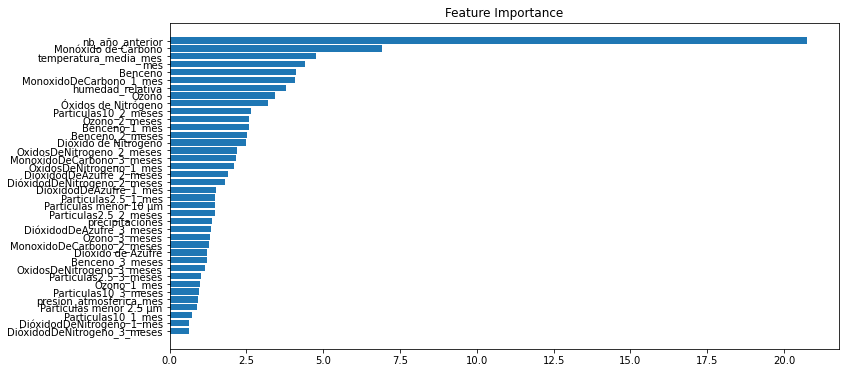

In [877]:
feature_importance = final_model_cb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

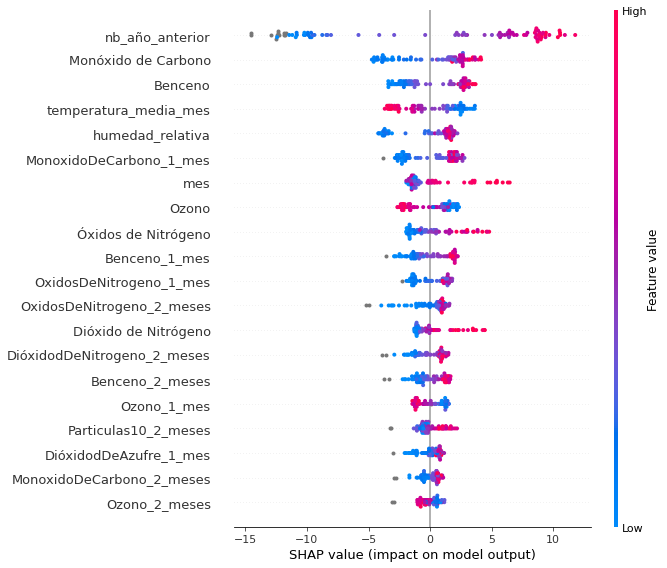

In [878]:
explainer = shap.TreeExplainer(final_model_cb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [879]:
pred3_nb=final_model_cb_nb.predict(X_train)
pred2_nb=final_model_cb_nb.predict(X_test)

In [880]:
mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train=mean_absolute_error(pred3_nb,y_train),mean_absolute_percentage_error(pred3_nb,y_train),np.sqrt(mean_squared_error(pred3_nb,y_train))
mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test=mean_absolute_error(pred2_nb,y_test),mean_absolute_percentage_error(pred2_nb,y_test),np.sqrt(mean_squared_error(pred2_nb,y_test))

In [881]:
errores_cb_nb_train=[mae_cb_nb_train,mape_cb_nb_train,rmse_cb_nb_train]
errores_cb_nb_test=[mae_cb_nb_test,mape_cb_nb_test,rmse_cb_nb_test]

In [882]:
df_num_ingresos_nb['predicciones_cb']=final_model_cb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/481367817.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para neumonia bacteriana

In [883]:
model3=LGBMRegressor()

In [884]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [885]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [886]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [887]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 20, 'learning_rate': 0.01},
 0.35191631517472904)

In [888]:
final_model_lgb_nb=LGBMRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_lgb_nb.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.01, max_depth=20, num_iterations=200)

In [889]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.198813


Text(0.5, 1.0, 'Feature Importance')

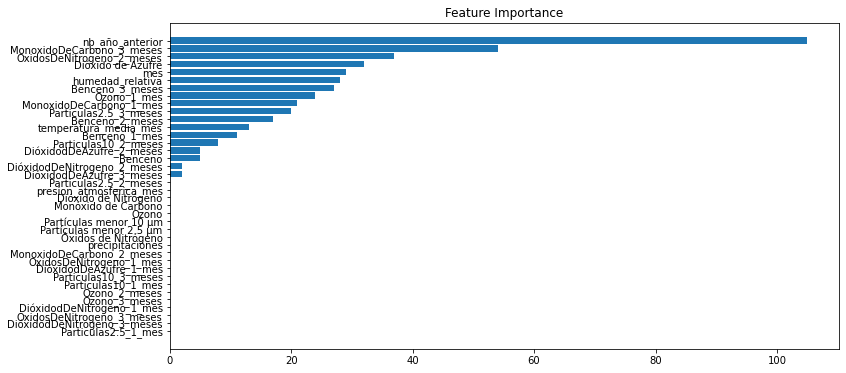

In [890]:
feature_importance = final_model_lgb_nb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

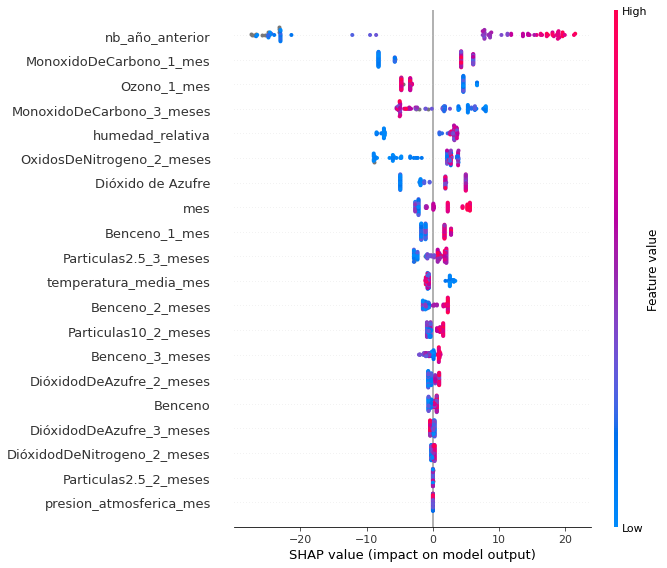

In [891]:
explainer = shap.TreeExplainer(final_model_lgb_nb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [892]:
pred5_nb=final_model_lgb_nb.predict(X_train)
pred4_nb=final_model_lgb_nb.predict(X_test)

In [893]:
mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train=mean_absolute_error(pred5_nb,y_train),mean_absolute_percentage_error(pred5_nb,y_train),np.sqrt(mean_squared_error(pred5_nb,y_train))
mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test=mean_absolute_error(pred4_nb,y_test),mean_absolute_percentage_error(pred4_nb,y_test),np.sqrt(mean_squared_error(pred4_nb,y_test))

In [894]:
errores_lgb_nb_train=[mae_lgb_nb_train,mape_lgb_nb_train,rmse_lgb_nb_train]
errores_lgb_nb_test=[mae_lgb_nb_test,mape_lgb_nb_test,rmse_lgb_nb_test]

In [895]:
df_errores_nb_train=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_train,'errores_cb_nb':errores_cb_nb_train,'errores_lgb_nb':errores_lgb_nb_train},index=['MAE','MAPE','RMSE'])
df_errores_nb_test=pd.DataFrame({'errores_xgb_nb':errores_xgb_nb_test,'errores_cb_nb':errores_cb_nb_test,'errores_lgb_nb':errores_lgb_nb_test},index=['MAE','MAPE','RMSE'])

In [896]:
df_errores_nb_train

errores_xgb_nb  errores_cb_nb  errores_lgb_nb
MAE         1.026469      22.031119       20.816352
MAPE        0.005306       0.116337        0.108803
RMSE        1.685360      30.532381       30.926599

In [897]:
df_errores_nb_test

errores_xgb_nb  errores_cb_nb  errores_lgb_nb
MAE        26.319590      31.004630       29.053457
MAPE        0.126457       0.160168        0.147479
RMSE       35.240284      34.330654       33.756650

In [898]:
df_num_ingresos_nb['predicciones_lgbm']=final_model_lgb_nb.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/813005327.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [899]:
px.line(df_num_ingresos_nb,x='fecha',y=['neumonia bacteriana','predicciones_lgbm','predicciones_cb','predicciones_xgb'])

## XGBoost para asma

In [900]:
columns_X=['Benceno','Dióxido de Azufre','Dióxido de Nitrógeno','Monóxido de Carbono','Ozono','Partículas menor 10 μm','Partículas menor 2.5 μm','Óxidos de Nitrógeno',
	'Benceno_1_mes',	'Benceno_2_meses'	,'Benceno_3_meses',	'DióxidodDeAzufre_1_mes',	'DióxidodDeAzufre_2_meses',	'DióxidodDeAzufre_3_meses',	
    'Ozono_1_mes',	'Ozono_2_meses',	'Ozono_3_meses',	'DióxidodDeNitrogeno_1_mes',	'DióxidodDeNitrogeno_2_meses',	'DióxidodDeNitrogeno_3_meses',	
    'MonoxidoDeCarbono_1_mes',	'MonoxidoDeCarbono_2_meses',	'MonoxidoDeCarbono_3_meses',	'OxidosDeNitrogeno_1_mes',	'OxidosDeNitrogeno_2_meses',
    'OxidosDeNitrogeno_3_meses',	'Particulas10_1_mes',	'Particulas10_2_meses',	'Particulas10_3_meses','Particulas2.5_1_mes',	'Particulas2.5_2_meses',
    'Particulas2.5_3_meses','temperatura_media_mes','precipitaciones','presion_atmosferica_mes','humedad_relativa','asma_año_anterior','mes']
columns_y='asma'


limite='2014-12-01'

X_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_X]
y_train=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha<=limite)][columns_y]
X_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_X]
y_test=df_def_diagnosticos[ (~df_def_diagnosticos[columns_y].isna()) & (df_def_diagnosticos.fecha>limite)][columns_y]

In [901]:
df_num_ingresos_a=df_def_diagnosticos[['fecha','asma']]

In [902]:
df_num_ingresos_a.dropna(inplace=True)

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/699617131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [903]:
model1=XGBRegressor()

In [904]:
param_grid = {
    'n_estimators': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [905]:
cv=RandomizedSearchCV(model1,param_grid,cv=5,n_jobs=-1)

In [906]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [907]:
cv.best_params_,cv.best_score_

({'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1},
 0.11660100814230227)

In [908]:
final_model_xgb_a=XGBRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_xgb_a.fit(    X_train, 
    y_train, 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=5)

[19:16:45] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "min_sample_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:98.70612	validation_1-rmse:100.31829
[1]	validation_0-rmse:89.74435	validation_1-rmse:90.84633
[2]	validation_0-rmse:81.68249	validation_1-rmse:82.83714
[3]	validation_0-rmse:74.41860	validation_1-rmse:75.91881
[4]	validation_0-rmse:67.80609	validation_1-rmse:69.02586
[5]	validation_0-rmse:61.86256	validation_1-rmse:63.38855
[6]	validation_0-rmse:56.48126	validation_1-rmse:58.34410
[7]	validation_0-rmse:51.63241	validation_1-rmse:53.71925
[8]	validation_0-rmse:47.26440	validation_1-rmse:48.71983
[9]	validation_0-rmse:43.30398	validation_1-rmse:45.26965
[10]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, min_sample_split=20, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [909]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.464372


Text(0.5, 1.0, 'Feature Importance')

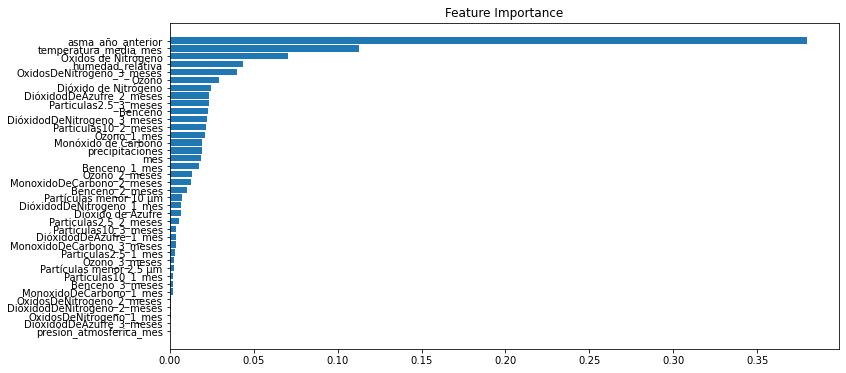

In [910]:
feature_importance = final_model_xgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



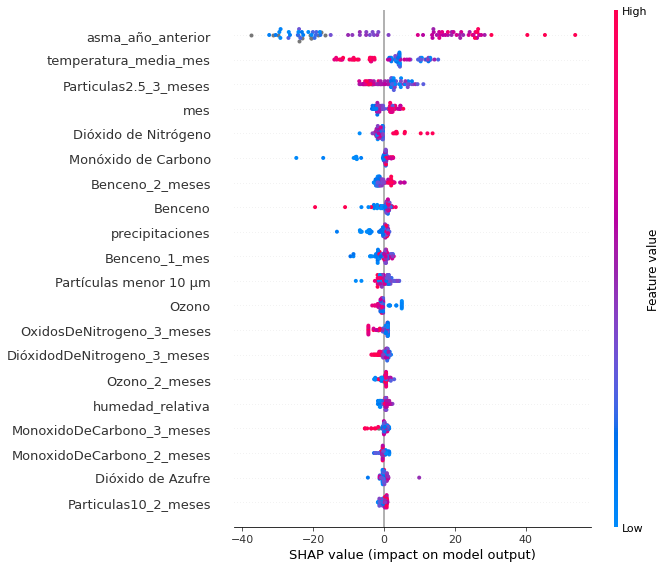

In [911]:
explainer = shap.TreeExplainer(final_model_xgb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [912]:
pred0_a=final_model_xgb_a.predict(X_train)
pred1_a=final_model_xgb_a.predict(X_test)

In [913]:
mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train=mean_absolute_error(pred0_a,y_train),mean_absolute_percentage_error(pred0_a,y_train),np.sqrt(mean_squared_error(pred0_a,y_train))
mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test=mean_absolute_error(pred1_a,y_test),mean_absolute_percentage_error(pred1_a,y_test),np.sqrt(mean_squared_error(pred1_a,y_test))

In [914]:
errores_xgb_a_train=[mae_xgb_a_train,mape_xgb_a_train,rmse_xgb_a_train]
errores_xgb_a_test=[mae_xgb_a_test,mape_xgb_a_test,rmse_xgb_a_test]

In [915]:
df_num_ingresos_a['predicciones_xgb']=final_model_xgb_a.predict(pd.concat([X_train,X_test]).sort_index())

c:\Users\carlo\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/3420313306.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## CatBoost para asma

In [916]:
model2=CatBoostRegressor()

In [917]:
param_grid = {
    'iterations': [10, 100,200],
    'depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [918]:
cv=RandomizedSearchCV(model2,param_grid,cv=5,n_jobs=-1)

In [919]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [ 0.19862194 -0.18408914         nan         nan  0.28986286 -0.17518104
  0.13088875         nan         nan  0.01340625]



0:	learn: 37.6072598	total: 71.7ms	remaining: 7.1s
1:	learn: 36.0606185	total: 135ms	remaining: 6.59s
2:	learn: 35.0564357	total: 189ms	remaining: 6.1s
3:	learn: 33.9518736	total: 233ms	remaining: 5.58s
4:	learn: 32.8596666	total: 275ms	remaining: 5.23s
5:	learn: 31.6559498	total: 320ms	remaining: 5.02s
6:	learn: 30.6905396	total: 365ms	remaining: 4.85s
7:	learn: 29.4590483	total: 411ms	remaining: 4.72s
8:	learn: 28.4578560	total: 432ms	remaining: 4.37s
9:	learn: 27.4569712	total: 481ms	remaining: 4.33s
10:	learn: 26.3705789	total: 525ms	remaining: 4.25s
11:	learn: 25.5966247	total: 567ms	remaining: 4.16s
12:	learn: 24.7225156	total: 622ms	remaining: 4.16s
13:	learn: 23.9271880	total: 666ms	remaining: 4.09s
14:	learn: 22.9852935	total: 713ms	remaining: 4.04s
15:	learn: 22.2303176	total: 756ms	remaining: 3.97s
16:	learn: 21.6235478	total: 799ms	remaining: 3.9s
17:	learn: 21.0589867	total: 850ms	remaining: 3.87s
18:	learn: 20.4634811	total: 892ms	remaining: 3.8s
19:	learn: 19.8542563	tot

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000027C45EEE820>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 10, 20],
                                        'iterations': [10, 100, 200],
                                        'learning_rate': [0.01, 0.001, 0.1, 1]})

In [920]:
cv.best_params_,cv.best_score_

({'learning_rate': 0.1, 'iterations': 100, 'depth': 10}, 0.2898628624604124)

In [921]:
final_model_cb_a=CatBoostRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_cb_a.fit(X_train,y_train,eval_set=[(X_train, y_train), (X_test, y_test)], 
    early_stopping_rounds=10)

0:	learn: 37.6072598	test: 37.6072598	test1: 37.1184843	best: 37.1184843 (0)	total: 38.8ms	remaining: 3.85s
1:	learn: 36.0606185	test: 36.0606185	test1: 36.3743301	best: 36.3743301 (1)	total: 82.1ms	remaining: 4.02s
2:	learn: 35.0564357	test: 35.0564357	test1: 36.1984859	best: 36.1984859 (2)	total: 129ms	remaining: 4.17s
3:	learn: 33.9518736	test: 33.9518736	test1: 36.2014670	best: 36.1984859 (2)	total: 174ms	remaining: 4.18s
4:	learn: 32.8596666	test: 32.8596666	test1: 36.3601348	best: 36.1984859 (2)	total: 219ms	remaining: 4.16s
5:	learn: 31.6559498	test: 31.6559498	test1: 35.2780999	best: 35.2780999 (5)	total: 263ms	remaining: 4.13s
6:	learn: 30.6905396	test: 30.6905396	test1: 34.6803322	best: 34.6803322 (6)	total: 312ms	remaining: 4.14s
7:	learn: 29.4590483	test: 29.4590483	test1: 33.8186265	best: 33.8186265 (7)	total: 359ms	remaining: 4.12s
8:	learn: 28.4578560	test: 28.4578560	test1: 32.6933264	best: 32.6933264 (8)	total: 379ms	remaining: 3.84s
9:	learn: 27.4569712	test: 27.45697

In [922]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:05.222988


Text(0.5, 1.0, 'Feature Importance')

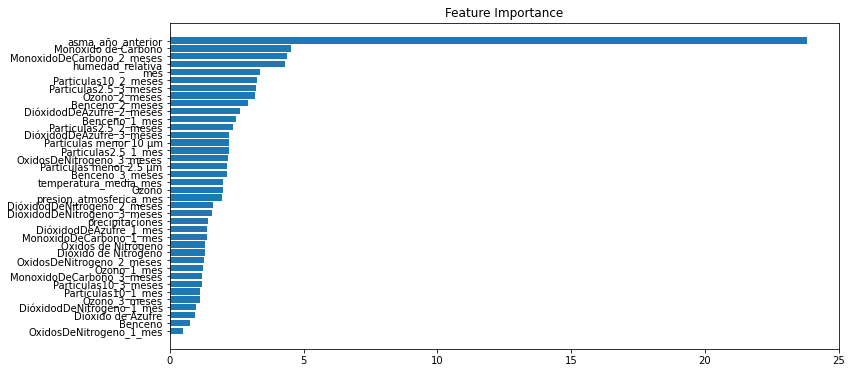

In [923]:
feature_importance = final_model_cb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

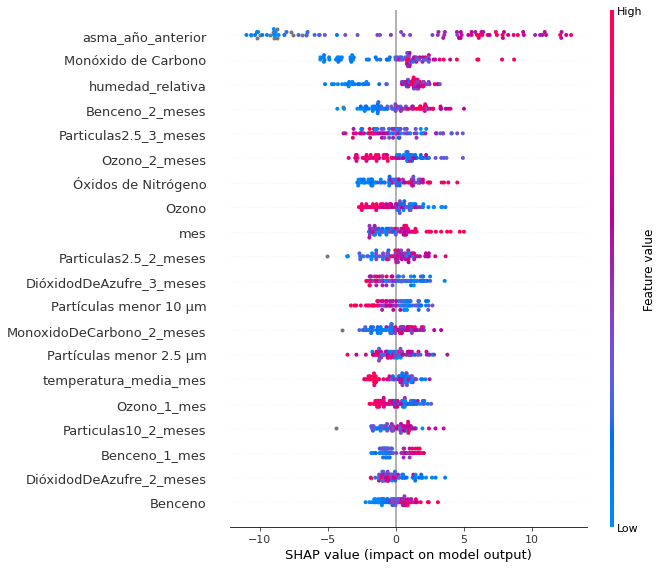

In [924]:
explainer = shap.TreeExplainer(final_model_cb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [925]:
pred3_a=final_model_cb_a.predict(X_train)
pred2_a=final_model_cb_a.predict(X_test)

In [926]:
mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train=mean_absolute_error(pred3_a,y_train),mean_absolute_percentage_error(pred3_a,y_train),np.sqrt(mean_squared_error(pred3_a,y_train))
mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test=mean_absolute_error(pred2_a,y_test),mean_absolute_percentage_error(pred2_a,y_test),np.sqrt(mean_squared_error(pred2_a,y_test))

In [927]:
errores_cb_a_train=[mae_cb_a_train,mape_cb_a_train,rmse_cb_a_train]
errores_cb_a_test=[mae_cb_a_test,mape_cb_a_test,rmse_cb_a_test]

In [928]:
df_num_ingresos_a['predicciones_cb']=final_model_cb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/1054010735.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## LightGBM para asma

In [929]:
model3=LGBMRegressor()

In [930]:
param_grid = {
    'num_iterations': [10, 100,200],
    'max_depth': [5, 10,20],
    'learning_rate':[0.01,0.001,0.1,1]
}

In [931]:
cv=RandomizedSearchCV(model3,param_grid,cv=5,n_jobs=-1)

In [932]:
cv.fit(X_train,y_train)

c:\Users\carlo\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1, 1],
                                        'max_depth': [5, 10, 20],
                                        'num_iterations': [10, 100, 200]})

In [933]:
cv.best_params_,cv.best_score_

({'num_iterations': 200, 'max_depth': 5, 'learning_rate': 1},
 0.4461828847487924)

In [934]:
final_model_lgb_a=LGBMRegressor(**cv.best_params_)
t=time.perf_counter()
final_model_lgb_a.fit(X_train,y_train)

LGBMRegressor(learning_rate=1, max_depth=5, num_iterations=200)

In [935]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))
print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 0:00:00.149199


Text(0.5, 1.0, 'Feature Importance')

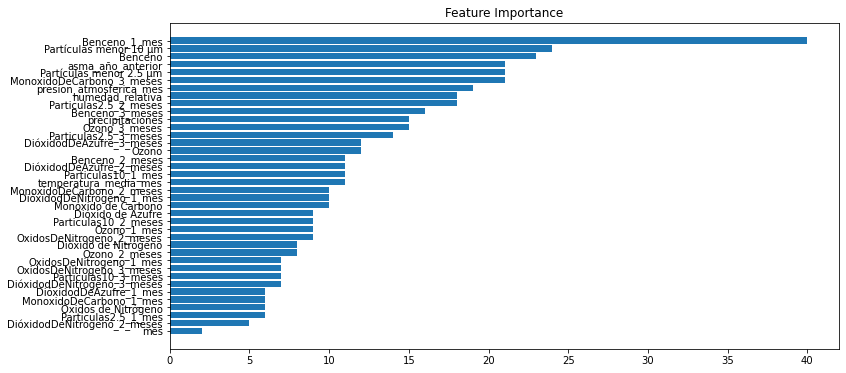

In [936]:
feature_importance = final_model_lgb_a.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

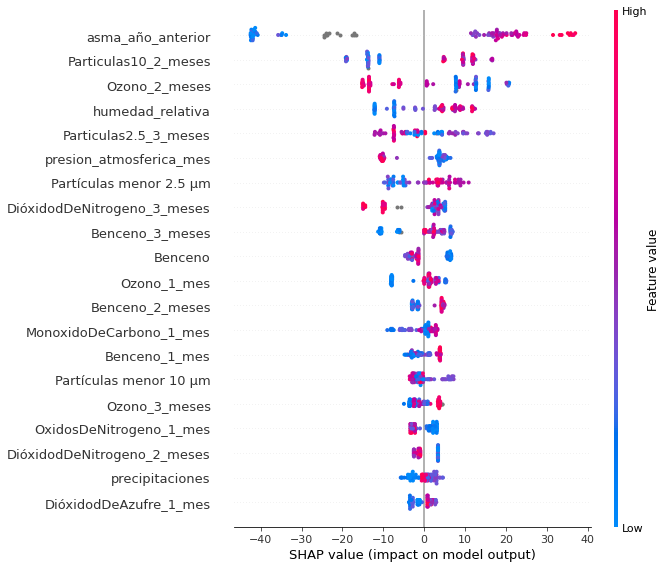

In [937]:
explainer = shap.TreeExplainer(final_model_lgb_a)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

In [938]:
pred5_a=final_model_lgb_a.predict(X_train)
pred4_a=final_model_lgb_a.predict(X_test)

In [939]:
mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train=mean_absolute_error(pred5_a,y_train),mean_absolute_percentage_error(pred5_a,y_train),np.sqrt(mean_squared_error(pred5_a,y_train))
mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test=mean_absolute_error(pred4_a,y_test),mean_absolute_percentage_error(pred4_a,y_test),np.sqrt(mean_squared_error(pred4_a,y_test))

In [940]:
errores_lgb_a_train=[mae_lgb_a_train,mape_lgb_a_train,rmse_lgb_a_train]
errores_lgb_a_test=[mae_lgb_a_test,mape_lgb_a_test,rmse_lgb_a_test]

In [941]:
df_errores_a_train=pd.DataFrame({'errores_xgb_a':errores_xgb_a_train,'errores_cb_a':errores_cb_a_train,'errores_lgb_a':errores_lgb_a_train},index=['MAE','MAPE','RMSE'])
df_errores_a_test=pd.DataFrame({'errores_xgb_a':errores_xgb_a_test,'errores_cb_a':errores_cb_a_test,'errores_lgb_a':errores_lgb_a_test},index=['MAE','MAPE','RMSE'])

In [942]:
df_errores_a_train

errores_xgb_a  errores_cb_a  errores_lgb_a
MAE        3.409303      1.596569       0.010934
MAPE       0.030212      0.020337       0.000130
RMSE       5.534776      2.199289       0.016691

In [943]:
df_errores_a_test

errores_xgb_a  errores_cb_a  errores_lgb_a
MAE       16.786937     20.582518      24.260538
MAPE       0.175675      0.214454       0.454891
RMSE      19.153889     22.958764      29.903092

In [944]:
df_num_ingresos_a['predicciones_lgbm']=final_model_lgb_a.predict(pd.concat([X_train,X_test]).sort_index())

C:\Users\carlo\AppData\Local\Temp/ipykernel_2792/3624501283.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [945]:
px.line(df_num_ingresos_a,x='fecha',y=['asma','predicciones_lgbm','predicciones_cb','predicciones_xgb'])